In [1]:
#numerical operations
import numpy as np
import pandas as pd

# date
import datetime as dt

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#report profiling
import pandas_profiling

#import stat model
from statsmodels.api import OLS

#splitting the data
from sklearn.model_selection import train_test_split

#removing warnings
import warnings 
warnings.filterwarnings('ignore')

# Import Data

In [2]:
cust=pd.read_csv(r'C:\Users\Deepika\Downloads\PYTHON\CUSTOMERS.csv')
cust

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


In [3]:
geo_loc=pd.read_csv(r'C:\Users\Deepika\Downloads\PYTHON\GEO_LOCATION.csv')
geo_loc

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh
...,...,...,...,...,...
19010,99955,-28.107588,-52.144019,Ghaziabad,Uttar Pradesh
19011,99970,-28.345143,-51.876926,Vadugapatti,Tamil Nadu
19012,99910,-27.863500,-52.084760,Akkarampalle,Andhra Pradesh
19013,99920,-27.858716,-52.300403,Kolkata,West Bengal


In [4]:
order_item=pd.read_csv(r'C:\Users\Deepika\Downloads\PYTHON\ORDER_ITEMS.csv')
order_item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72


In [5]:
order_pay=pd.read_csv(r'C:\Users\Deepika\Downloads\PYTHON\ORDER_PAYMENTS.csv')
order_pay

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [6]:
order_review=pd.read_csv(r'C:\Users\Deepika\Downloads\PYTHON\ORDER_REVIEW_RATINGS.csv')
order_review

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26
...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,12/9/2017 0:00,12/11/2017 20:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,3/22/2018 0:00,3/23/2018 9:10
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,7/1/2018 0:00,7/2/2018 12:59
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,12/15/2017 0:00,12/16/2017 1:29


In [7]:
orders=pd.read_csv(r'C:\Users\Deepika\Downloads\PYTHON\ORDERS.csv')
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00


In [8]:
prod=pd.read_csv(r'C:\Users\Deepika\Downloads\PYTHON\PRODUCTS.csv')
prod

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture_Decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction_Tools_Lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Bed_Bath_Table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,Computers_Accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [9]:
sellers=pd.read_csv(r'C:\Users\Deepika\Downloads\PYTHON\SELLERS.csv')
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,Kalan Wali,Haryana
3091,f8201cab383e484733266d1906e2fdfa,88137,Bopal,Gujarat
3092,74871d19219c7d518d0090283e03c137,4650,Akkarampalle,Andhra Pradesh
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,Ekambara kuppam,Andhra Pradesh


# Data Audit

In [10]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [11]:
cust.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,Naspur,Andhra Pradesh


In [12]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
cust.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [14]:
cust.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [15]:
geo_loc.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [16]:
geo_loc.tail()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
19010,99955,-28.107588,-52.144019,Ghaziabad,Uttar Pradesh
19011,99970,-28.345143,-51.876926,Vadugapatti,Tamil Nadu
19012,99910,-27.863500,-52.084760,Akkarampalle,Andhra Pradesh
19013,99920,-27.858716,-52.300403,Kolkata,West Bengal
19014,99952,-28.160371,-51.936922,Akkarampalle,Andhra Pradesh


In [17]:
geo_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [18]:
geo_loc.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [19]:
geo_loc.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [20]:
order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [21]:
order_item.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,6/12/2018 17:10,43.00,12.79


In [22]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [23]:
order_item.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [24]:
order_item.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [25]:
order_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [26]:
order_pay.tail()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,UPI,1,191.58


In [27]:
order_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [28]:
order_pay.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [29]:
order_pay.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [30]:
order_review.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [31]:
order_review.tail()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,12/9/2017 0:00,12/11/2017 20:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,3/22/2018 0:00,3/23/2018 9:10
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,7/1/2018 0:00,7/2/2018 12:59
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,12/15/2017 0:00,12/16/2017 1:29
99999,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,7/3/2017 0:00,7/3/2017 21:01


In [32]:
order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [33]:
order_review.dtypes

review_id                  object
order_id                   object
review_score                int64
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [34]:
order_review.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [35]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [36]:
orders.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,3/8/2018 20:57,3/9/2018 11:20,3/9/2018 22:11,3/16/2018 13:08,4/3/2018 0:00


In [37]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [38]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [39]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [40]:
prod.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [41]:
prod.tail()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture_Decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction_Tools_Lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Bed_Bath_Table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,Computers_Accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,Bed_Bath_Table,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


In [42]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [43]:
prod.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [44]:
prod.isna().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [45]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [46]:
sellers.tail()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3090,98dddbc4601dd4443ca174359b237166,87111,Kalan Wali,Haryana
3091,f8201cab383e484733266d1906e2fdfa,88137,Bopal,Gujarat
3092,74871d19219c7d518d0090283e03c137,4650,Akkarampalle,Andhra Pradesh
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,Ekambara kuppam,Andhra Pradesh
3094,9e25199f6ef7e7c347120ff175652c3b,12051,Khongapani,Chhattisgarh


In [47]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [48]:
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [49]:
sellers.isna().sum()

seller_id                  0
seller_zip_code_prefix     0
seller_city               57
seller_state              57
dtype: int64

# Data Cleaning

In [50]:
#1] In Order Item
#Converting dtypes for shipping limit date
order_item.shipping_limit_date=pd.to_datetime(order_item.shipping_limit_date,format='%m/%d/%Y %H:%M')

In [51]:
order_item.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [52]:
#2] In Order Review
# Converting dtpyes for review_creation_date and review_answer_timestamp 
order_review.review_creation_date=pd.to_datetime(order_review.review_creation_date,format='%m/%d/%Y %H:%M')
order_review.review_answer_timestamp=pd.to_datetime(order_review.review_answer_timestamp,format='%m/%d/%Y %H:%M')

In [53]:
order_review.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [54]:
#3] In Orders
#Converting dtypes for order_purchase_timestamp,order_approved_at, order_delivered_carrier_date,order_delivered_customer_date and order_estimated_delivery_date
orders.order_purchase_timestamp=pd.to_datetime(orders.order_purchase_timestamp,format='%m/%d/%Y %H:%M')
orders.order_approved_at=pd.to_datetime(orders.order_approved_at,format='%m/%d/%Y %H:%M')
orders.order_delivered_carrier_date=pd.to_datetime(orders.order_delivered_carrier_date,format='%m/%d/%Y %H:%M')
orders.order_delivered_customer_date=pd.to_datetime(orders.order_delivered_customer_date,format='%m/%d/%Y %H:%M')
orders.order_estimated_delivery_date=pd.to_datetime(orders.order_estimated_delivery_date,format='%m/%d/%Y %H:%M')


In [55]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [56]:
# dropping missing values in a order_approved_at,order_delivered_carrier_date and order_delivered_customer_date
orders=orders.dropna(subset=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date'])

In [57]:
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [58]:
#4] In Products
# Missing Treatment

missing_imputer={}
for i in prod:
    if pd.api.types.is_number(prod[i]):
        missing_imputer[i] = prod[i].mean()
    else:
        missing_imputer[i] = prod[i].mode()[0]
        

missing_imputer

{'product_id': '00066f42aeeb9f3007548bb9d3f33c38',
 'product_category_name': 'Bed_Bath_Table',
 'product_name_lenght': 60.0,
 'product_description_lenght': 404.0,
 'product_photos_qty': 1.0,
 'product_weight_g': 200.0,
 'product_length_cm': 16.0,
 'product_height_cm': 10.0,
 'product_width_cm': 11.0}

In [59]:
prod= prod.fillna(missing_imputer)

In [60]:
prod.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [61]:
#5] In Sellers
# Missing Treatment

missing_imputer={}
for i in sellers:
    if pd.api.types.is_number(sellers[i]):
        missing_imputer[i] = sellers[i].mean()
    else:
        missing_imputer[i] = sellers[i].mode()[0]
        

missing_imputer

{'seller_id': '0015a82c2db000af6aaaf3ae2ecb0532',
 'seller_zip_code_prefix': 14940,
 'seller_city': 'Akkarampalle',
 'seller_state': 'Andhra Pradesh'}

In [62]:
sellers= sellers.fillna(missing_imputer)

In [63]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

# EDA

In [64]:
data=pd.merge(left=cust,right=orders,left_on='customer_id',right_on='customer_id',how='inner')
data=pd.merge(left=data,right=order_item,left_on='order_id',right_on='order_id',how='inner')
data=pd.merge(left=data,right=order_pay,left_on='order_id',right_on='order_id',how='inner')
data=pd.merge(left=data,right=order_review,left_on='order_id',right_on='order_id',how='inner')
data=pd.merge(left=data,right=prod,left_on='product_id',right_on='product_id',how='inner')
data=pd.merge(left=data,right=sellers,left_on='seller_id',right_on='seller_id',how='inner')
f_data=pd.merge(left=data,right=geo_loc,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

f_data







,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,...,64.0,31.0,8577,Vijayawada,Andhra Pradesh,14409,-20.509898,-47.397866,Adilabad,Andhra Pradesh
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,Adilabad,Andhra Pradesh,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:00,2018-06-15 20:41:00,2018-06-18 15:52:00,...,10.0,40.0,14940,Tarsali,Gujarat,14409,-20.509898,-47.397866,Adilabad,Andhra Pradesh
2,48a9965057e1c75ed3a4d511714be18b,2be1bf7d96bccea9775dcd4c5cbde376,14409,Adilabad,Andhra Pradesh,dbabdffb9ca50a2b51c3501d849e311b,delivered,2017-06-11 17:20:00,2017-06-11 17:45:00,2017-06-13 09:18:00,...,30.0,43.0,14940,Tarsali,Gujarat,14409,-20.509898,-47.397866,Adilabad,Andhra Pradesh
3,3ecddf921de5c14ec1f8bad33216e058,8930b5479cc98921206e7f37545c55ad,14409,Adilabad,Andhra Pradesh,dc7b936d5f26f7506fc2242764d07424,delivered,2017-07-02 00:19:00,2017-07-02 00:30:00,2017-07-04 08:50:00,...,7.0,35.0,13405,Bellampalle,Andhra Pradesh,14409,-20.509898,-47.397866,Adilabad,Andhra Pradesh
4,85db3d57353cb12f8ccf1140ea473082,6741fe058b7a7605920b9060b234294e,14409,Adilabad,Andhra Pradesh,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:00,2018-05-08 12:29:00,2018-05-09 10:13:00,...,60.0,20.0,4782,Akkarampalle,Andhra Pradesh,14409,-20.509898,-47.397866,Adilabad,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115403,f48c503766cc6385fe6947e623c20b65,5b2f88631e76ec357578704f3a123737,91791,Eluru,Andhra Pradesh,b13efaac3f8cb7730ba737059abc614b,delivered,2017-10-26 11:22:00,2017-10-26 11:37:00,2017-10-31 16:58:00,...,20.0,20.0,5041,Akkarampalle,Andhra Pradesh,91791,-30.144365,-51.126372,Eluru,Andhra Pradesh
115404,f48c503766cc6385fe6947e623c20b65,5b2f88631e76ec357578704f3a123737,91791,Eluru,Andhra Pradesh,b13efaac3f8cb7730ba737059abc614b,delivered,2017-10-26 11:22:00,2017-10-26 11:37:00,2017-10-31 16:58:00,...,20.0,20.0,5041,Akkarampalle,Andhra Pradesh,91791,-30.144365,-51.126372,Eluru,Andhra Pradesh
115405,f48c503766cc6385fe6947e623c20b65,5b2f88631e76ec357578704f3a123737,91791,Eluru,Andhra Pradesh,b13efaac3f8cb7730ba737059abc614b,delivered,2017-10-26 11:22:00,2017-10-26 11:37:00,2017-10-31 16:58:00,...,20.0,20.0,5041,Akkarampalle,Andhra Pradesh,91791,-30.144365,-51.126372,Eluru,Andhra Pradesh
115406,86025340edc60ca36327c4169f070f8e,132d0bbffd4ef7e3461c6fe4392b65ce,89642,Serpur,West Bengal,e9613fa6e02ff8ae45f37ca30b0468a1,delivered,2017-12-20 12:04:00,2017-12-20 12:17:00,2017-12-20 23:09:00,...,11.0,26.0,39442,Mandi Dabwali,Haryana,89642,-27.105454,-51.250082,Serpur,West Bengal


In [65]:
f_data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_zip_code_prefix',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state'],
      dtype='objec

In [66]:
f_data.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                        int64
payment_type                             object
payment_installments                    

In [67]:
f_data.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
product_category_name            0
product_name_lenght              0
product_description_

In [68]:
f_data.shape

(115408, 42)

In [69]:
#dropping the columns which are not used
f_data=f_data.drop(columns=['customer_zip_code_prefix','customer_city','customer_state','order_approved_at','order_delivered_carrier_date',
                    'order_estimated_delivery_date','order_delivered_customer_date','freight_value','review_creation_date','review_answer_timestamp',
                    'product_name_lenght','product_description_lenght','product_weight_g','product_length_cm','product_height_cm','product_width_cm',
                    'seller_zip_code_prefix','geolocation_zip_code_prefix','geolocation_lat','geolocation_lng'])
f_data

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,...,payment_installments,payment_value,review_id,review_score,product_category_name,product_photos_qty,seller_city,seller_state,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:00,124.99,...,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,Office_Furniture,1.0,Vijayawada,Andhra Pradesh,Adilabad,Andhra Pradesh
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:00,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-06-19 20:30:00,79.90,...,8,94.77,16a27e5ffd29a7cdf0e4984b0cab46b7,5,Bed_Bath_Table,1.0,Tarsali,Gujarat,Adilabad,Andhra Pradesh
2,48a9965057e1c75ed3a4d511714be18b,2be1bf7d96bccea9775dcd4c5cbde376,dbabdffb9ca50a2b51c3501d849e311b,delivered,2017-06-11 17:20:00,1,fcad6e5643f855de4b616a24e6dd25e4,4a3ca9315b744ce9f8e9374361493884,2017-06-15 17:45:00,286.40,...,8,323.91,1991c75dd8acba50a854d1a24a876827,5,Bed_Bath_Table,1.0,Tarsali,Gujarat,Adilabad,Andhra Pradesh
3,3ecddf921de5c14ec1f8bad33216e058,8930b5479cc98921206e7f37545c55ad,dc7b936d5f26f7506fc2242764d07424,delivered,2017-07-02 00:19:00,1,9e572ff4654f7064419d97a891a8b0fc,da8622b14eb17ae2831f4ac5b9dab84a,2017-07-06 00:30:00,139.90,...,7,153.90,8205dbde4cd80eda56952f2f100429ff,5,Bed_Bath_Table,1.0,Bellampalle,Andhra Pradesh,Adilabad,Andhra Pradesh
4,85db3d57353cb12f8ccf1140ea473082,6741fe058b7a7605920b9060b234294e,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:00,1,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:00,130.00,...,8,290.00,ba4c8e4f655a804a0d2f05866e4fb063,5,Housewares,6.0,Akkarampalle,Andhra Pradesh,Adilabad,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115403,f48c503766cc6385fe6947e623c20b65,5b2f88631e76ec357578704f3a123737,b13efaac3f8cb7730ba737059abc614b,delivered,2017-10-26 11:22:00,3,b48d3e49914549b781c0b59f819b398e,d4a5e99e0dd915df64ba55a7fbd583fd,2017-11-01 11:35:00,7.45,...,1,107.75,bc6df7d809a4b1790acff316a1457065,1,Health_Beauty,2.0,Akkarampalle,Andhra Pradesh,Eluru,Andhra Pradesh
115404,f48c503766cc6385fe6947e623c20b65,5b2f88631e76ec357578704f3a123737,b13efaac3f8cb7730ba737059abc614b,delivered,2017-10-26 11:22:00,4,b48d3e49914549b781c0b59f819b398e,d4a5e99e0dd915df64ba55a7fbd583fd,2017-11-01 11:35:00,7.45,...,1,107.75,bc6df7d809a4b1790acff316a1457065,1,Health_Beauty,2.0,Akkarampalle,Andhra Pradesh,Eluru,Andhra Pradesh
115405,f48c503766cc6385fe6947e623c20b65,5b2f88631e76ec357578704f3a123737,b13efaac3f8cb7730ba737059abc614b,delivered,2017-10-26 11:22:00,5,b48d3e49914549b781c0b59f819b398e,d4a5e99e0dd915df64ba55a7fbd583fd,2017-11-01 11:35:00,7.45,...,1,107.75,bc6df7d809a4b1790acff316a1457065,1,Health_Beauty,2.0,Akkarampalle,Andhra Pradesh,Eluru,Andhra Pradesh
115406,86025340edc60ca36327c4169f070f8e,132d0bbffd4ef7e3461c6fe4392b65ce,e9613fa6e02ff8ae45f37ca30b0468a1,delivered,2017-12-20 12:04:00,1,f619f125af192e28da946f3382e783a6,9b00cad94ef3078faf6fba2e792c158f,2017-12-27 12:17:00,354.90,...,1,250.00,e6680fa90ee777c42a883a7db0bc43d3,5,Sports_Leisure,2.0,Mandi Dabwali,Haryana,Serpur,West Bengal


In [70]:
Total_Revenue=f_data.price.sum()
Total_Revenue

13837444.700000003

In [71]:
Total_Qty=f_data.product_photos_qty.sum()
Total_Qty

252669.0

In [72]:
Total_prod=f_data.product_id.count()
Total_prod

115408

In [73]:
Total_prodcat=len(f_data.product_category_name.unique())
Total_prodcat

71

In [74]:
Total_sellers=f_data.seller_id.count()
Total_sellers

115408

In [75]:
Total_city=len(f_data.geolocation_city.unique())
Total_city

3769

In [76]:
Total_state=len(f_data.geolocation_state.unique())
Total_state

20

In [77]:
Total_pay_mode=len(f_data.payment_type.unique())
Total_pay_mode


4

In [78]:
avg_review_score=f_data.review_score.mean()
avg_review_score

4.0648915153195615

In [79]:
max_pay_installments=f_data.payment_installments.max()
max_pay_installments

24

In [80]:
# Creating a column for Month,Year,Week and Day from order purchase
f_data['Month']=f_data.order_purchase_timestamp.apply(lambda x:x.month)
f_data['Week']=f_data.order_purchase_timestamp.apply(lambda x:x.week)
f_data['Day']=f_data.order_purchase_timestamp.apply(lambda x:x.day)
f_data['Year']=f_data.order_purchase_timestamp.apply(lambda x:x.year)
f_data=f_data.drop(columns=['order_purchase_timestamp'])
f_data

,customer_id,customer_unique_id,order_id,order_status,order_item_id,product_id,seller_id,shipping_limit_date,price,payment_sequential,...,product_category_name,product_photos_qty,seller_city,seller_state,geolocation_city,geolocation_state,Month,Week,Day,Year
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:00,124.99,1,...,Office_Furniture,1.0,Vijayawada,Andhra Pradesh,Adilabad,Andhra Pradesh,5,20,16,2017
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,95261f608a64bbbe760a212b4d48a4ee,delivered,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-06-19 20:30:00,79.90,1,...,Bed_Bath_Table,1.0,Tarsali,Gujarat,Adilabad,Andhra Pradesh,6,24,15,2018
2,48a9965057e1c75ed3a4d511714be18b,2be1bf7d96bccea9775dcd4c5cbde376,dbabdffb9ca50a2b51c3501d849e311b,delivered,1,fcad6e5643f855de4b616a24e6dd25e4,4a3ca9315b744ce9f8e9374361493884,2017-06-15 17:45:00,286.40,1,...,Bed_Bath_Table,1.0,Tarsali,Gujarat,Adilabad,Andhra Pradesh,6,23,11,2017
3,3ecddf921de5c14ec1f8bad33216e058,8930b5479cc98921206e7f37545c55ad,dc7b936d5f26f7506fc2242764d07424,delivered,1,9e572ff4654f7064419d97a891a8b0fc,da8622b14eb17ae2831f4ac5b9dab84a,2017-07-06 00:30:00,139.90,1,...,Bed_Bath_Table,1.0,Bellampalle,Andhra Pradesh,Adilabad,Andhra Pradesh,7,26,2,2017
4,85db3d57353cb12f8ccf1140ea473082,6741fe058b7a7605920b9060b234294e,98991dc034323e310fdd97b8af6064b0,delivered,1,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:00,130.00,1,...,Housewares,6.0,Akkarampalle,Andhra Pradesh,Adilabad,Andhra Pradesh,5,19,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115403,f48c503766cc6385fe6947e623c20b65,5b2f88631e76ec357578704f3a123737,b13efaac3f8cb7730ba737059abc614b,delivered,3,b48d3e49914549b781c0b59f819b398e,d4a5e99e0dd915df64ba55a7fbd583fd,2017-11-01 11:35:00,7.45,1,...,Health_Beauty,2.0,Akkarampalle,Andhra Pradesh,Eluru,Andhra Pradesh,10,43,26,2017
115404,f48c503766cc6385fe6947e623c20b65,5b2f88631e76ec357578704f3a123737,b13efaac3f8cb7730ba737059abc614b,delivered,4,b48d3e49914549b781c0b59f819b398e,d4a5e99e0dd915df64ba55a7fbd583fd,2017-11-01 11:35:00,7.45,1,...,Health_Beauty,2.0,Akkarampalle,Andhra Pradesh,Eluru,Andhra Pradesh,10,43,26,2017
115405,f48c503766cc6385fe6947e623c20b65,5b2f88631e76ec357578704f3a123737,b13efaac3f8cb7730ba737059abc614b,delivered,5,b48d3e49914549b781c0b59f819b398e,d4a5e99e0dd915df64ba55a7fbd583fd,2017-11-01 11:35:00,7.45,1,...,Health_Beauty,2.0,Akkarampalle,Andhra Pradesh,Eluru,Andhra Pradesh,10,43,26,2017
115406,86025340edc60ca36327c4169f070f8e,132d0bbffd4ef7e3461c6fe4392b65ce,e9613fa6e02ff8ae45f37ca30b0468a1,delivered,1,f619f125af192e28da946f3382e783a6,9b00cad94ef3078faf6fba2e792c158f,2017-12-27 12:17:00,354.90,2,...,Sports_Leisure,2.0,Mandi Dabwali,Haryana,Serpur,West Bengal,12,51,20,2017


In [81]:
#Understanding how many new customers acquired every month
#Created a new column called Occurence to know the new and existing customers
d=f_data.assign(Occurence=np.where(~f_data['customer_id'].duplicated(),'New','Existing'))
new_cust=d.loc[(d.Occurence=='New')].groupby(by=['Month'])[['customer_id']].count()
new_cust=new_cust.sort_values(by='customer_id',ascending=False)
new_cust


,customer_id
Month,
8,10511
5,10268
7,10004
3,9521
6,9203
4,9074
2,8174
1,7803
11,7267


In [82]:
#Understanding how many retention customers(existing customers) there in a month wise
retention_cust=d.loc[(d.Occurence=='Existing')].groupby(by=['Month'])[['customer_id']].count()
retention_cust.sort_values(by='customer_id',ascending=False)
retention_cust

,customer_id
Month,
1,1579
2,1627
3,1931
4,1737
5,2119
6,1811
7,1960
8,1911
9,891


<AxesSubplot:xlabel='Month'>

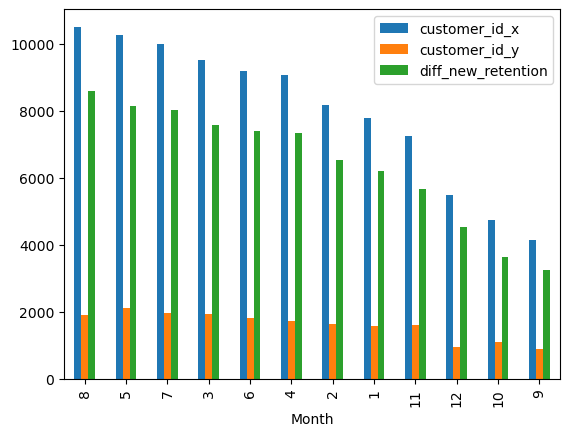

In [83]:
#Understanding thier differences
diff_cust=pd.merge(left=new_cust,right=retention_cust,left_on='Month',right_on='Month',how='inner')
diff_cust['diff_new_retention']=diff_cust.customer_id_x-diff_cust.customer_id_y
diff_cust.sort_values(by='diff_new_retention',ascending=False).plot(kind='bar')

In [84]:
#Understanding revenue by new customers
new_cust_revenue=d.loc[(d.Occurence=='New')].groupby(by=['Month'])[['price']].sum()
new_cust_revenue=new_cust_revenue.sort_values(by='price',ascending=False)
new_cust_revenue

,price
Month,
5,1326420.56
8,1277176.52
7,1228826.24
4,1207537.17
3,1204189.49
6,1173250.08
2,967728.49
1,943284.82
11,883310.89


In [85]:
# Understanding revenue by existing customers
ex_cust_revenue=d.loc[(d.Occurence=='Existing')].groupby(by=['Month'])[['price']].sum()
ex_cust_revenue=ex_cust_revenue.sort_values(by='price',ascending=False)
ex_cust_revenue

,price
Month,
5,215434.30
7,184849.52
3,173781.09
8,170217.28
6,168376.22
4,159914.14
2,145139.48
11,144683.77
1,144072.13


<AxesSubplot:xlabel='Month'>

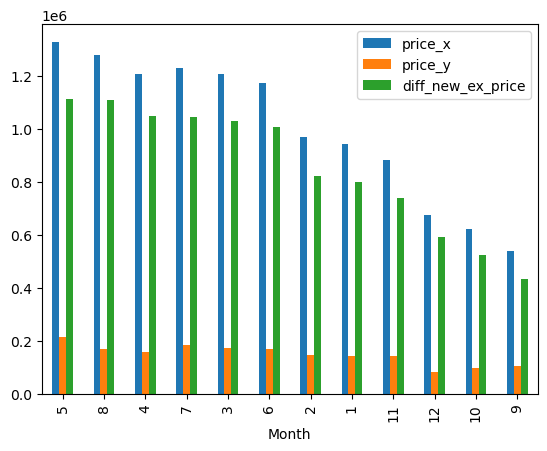

In [86]:
# Understanding revenue from new/existing customers based on month
diff_cust_revenue=pd.merge(left=new_cust_revenue,right=ex_cust_revenue,left_on='Month',right_on='Month',how='inner')
diff_cust_revenue['diff_new_ex_price']=diff_cust_revenue.price_x-diff_cust_revenue.price_y
diff_cust_revenue.sort_values(by='diff_new_ex_price',ascending=False).plot(kind='bar')

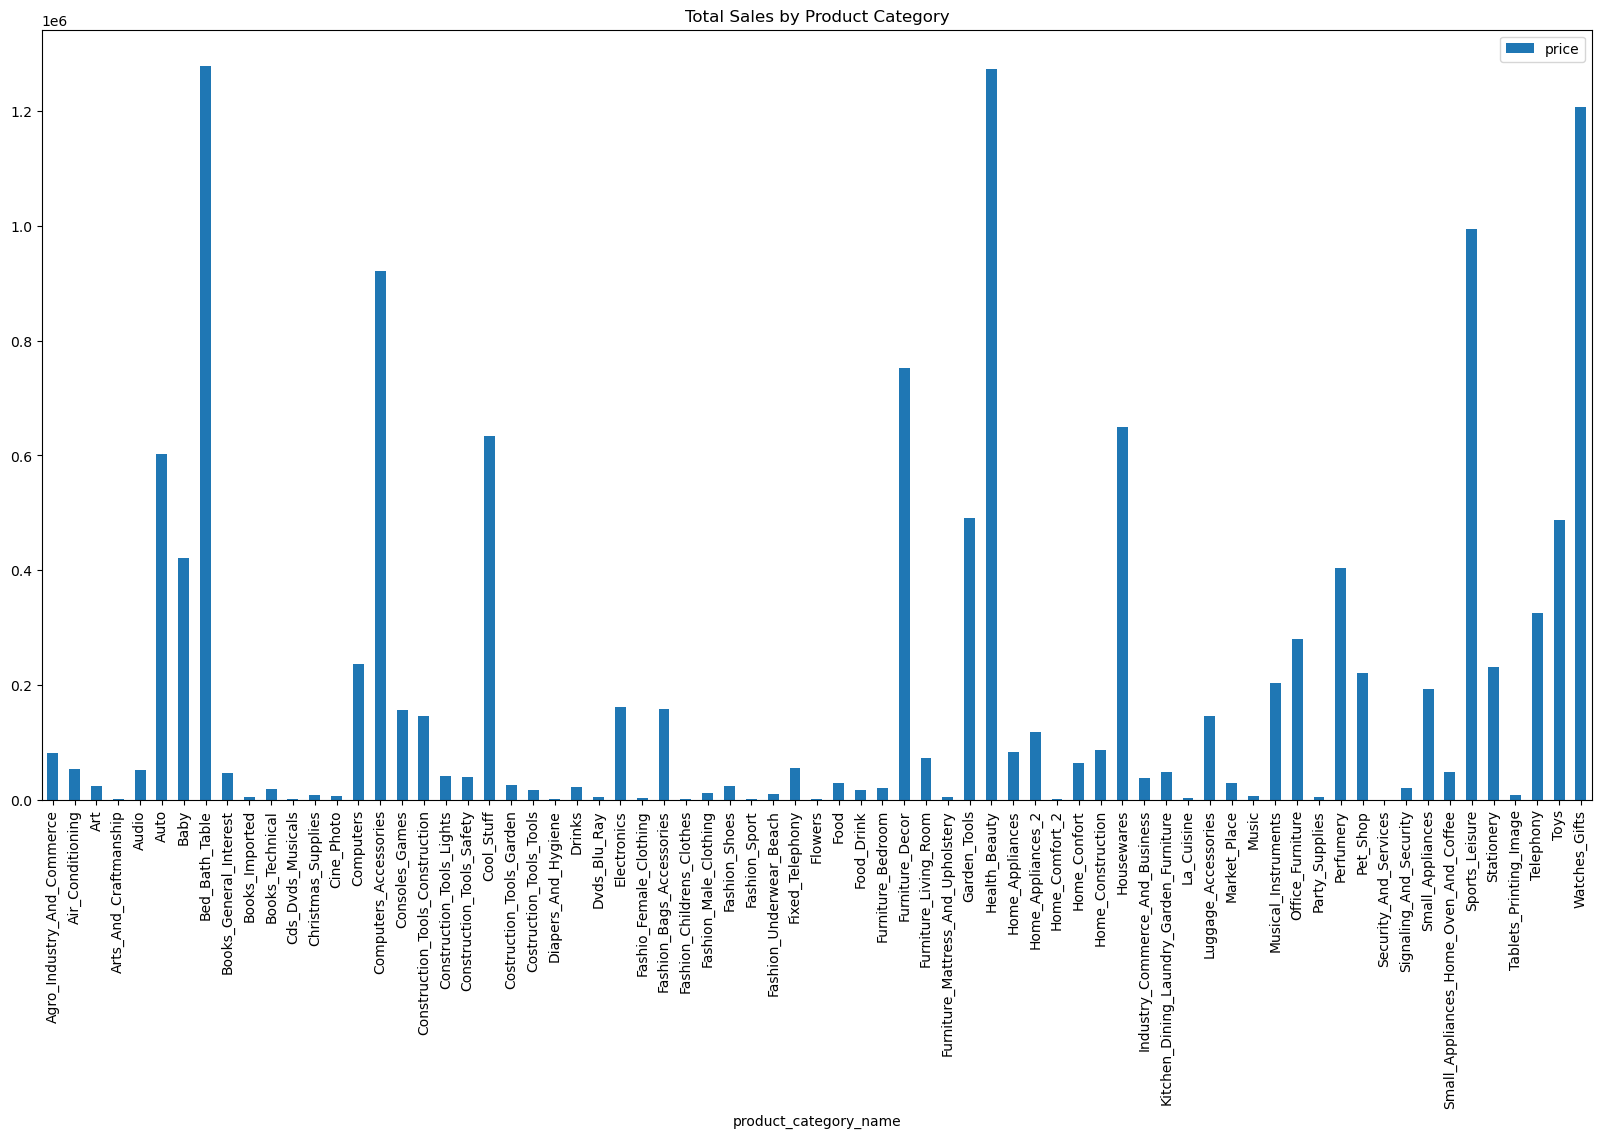

In [87]:
#Total Sales by Product Category
f_data.groupby(by=['product_category_name'])[['price']].sum().plot(kind='bar',figsize=[20,10],title='Total Sales by Product Category')
plt.show()


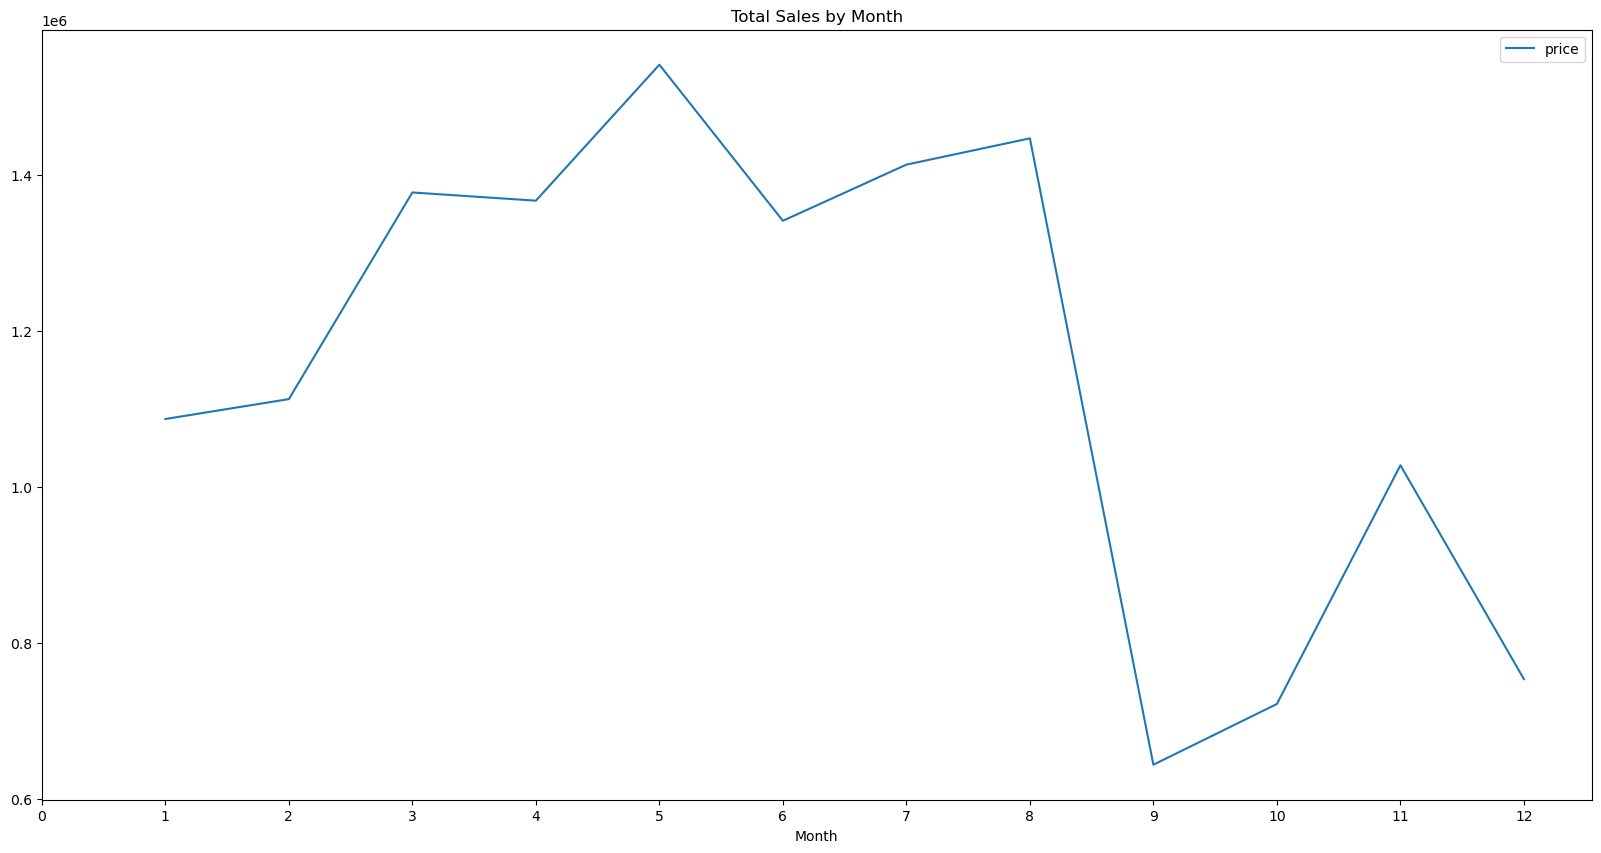

In [88]:
#Total Sales By Month
f_data.groupby(by=['Month'])[['price']].sum().plot(kind='line',figsize=[20,10],title='Total Sales by Month',xticks=range(0,13))
plt.show()

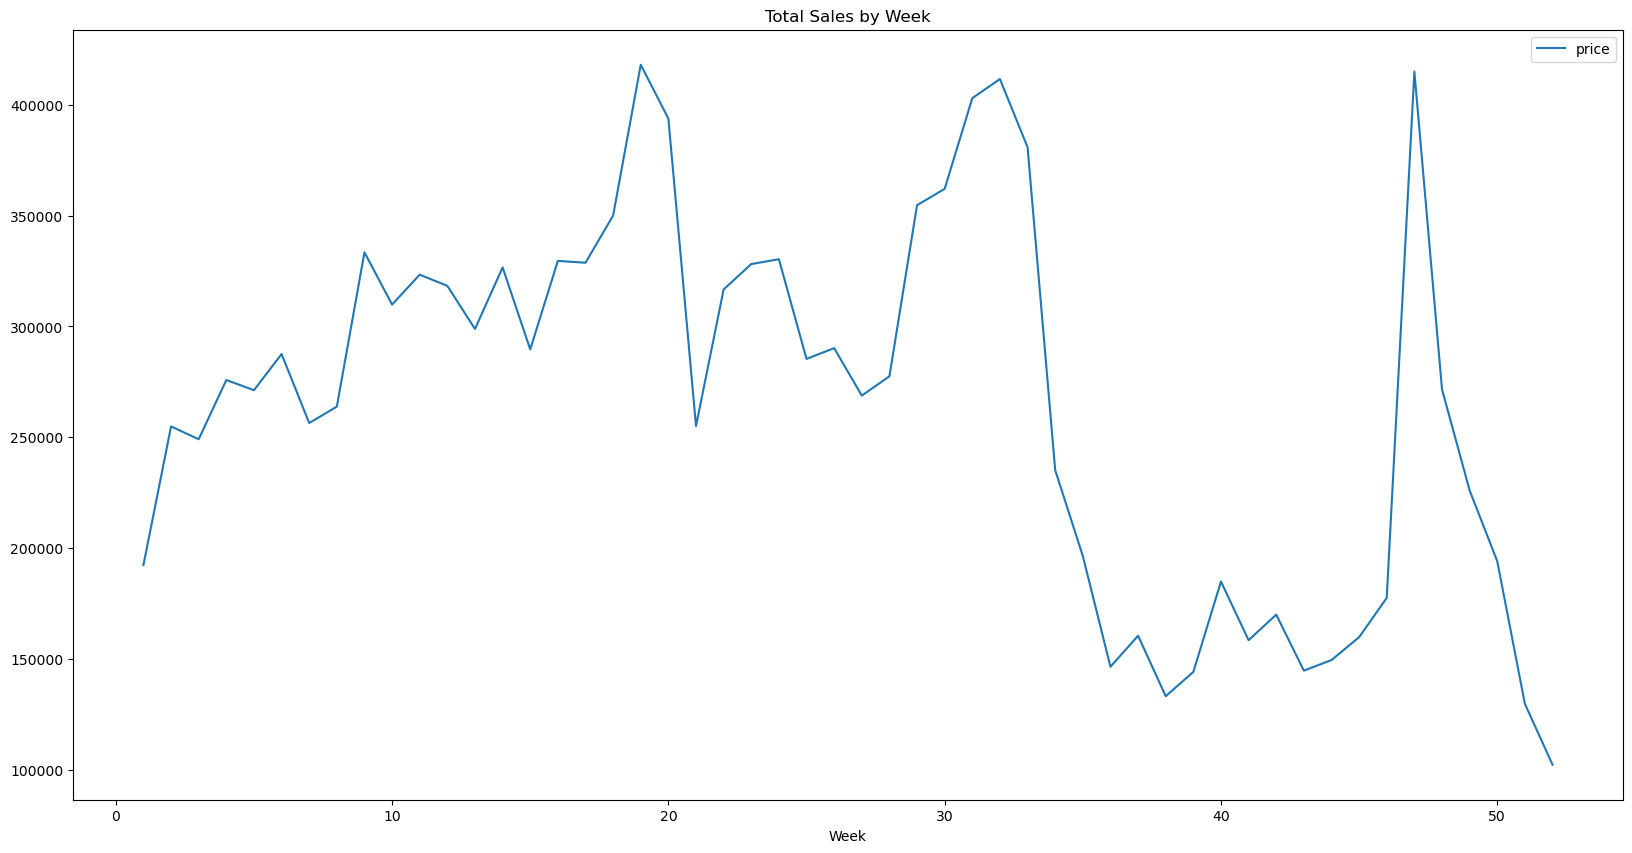

In [89]:
#Total Sales By Week
f_data.groupby(by=['Week'])[['price']].sum().plot(kind='line',figsize=[20,10],title='Total Sales by Week')
plt.show()

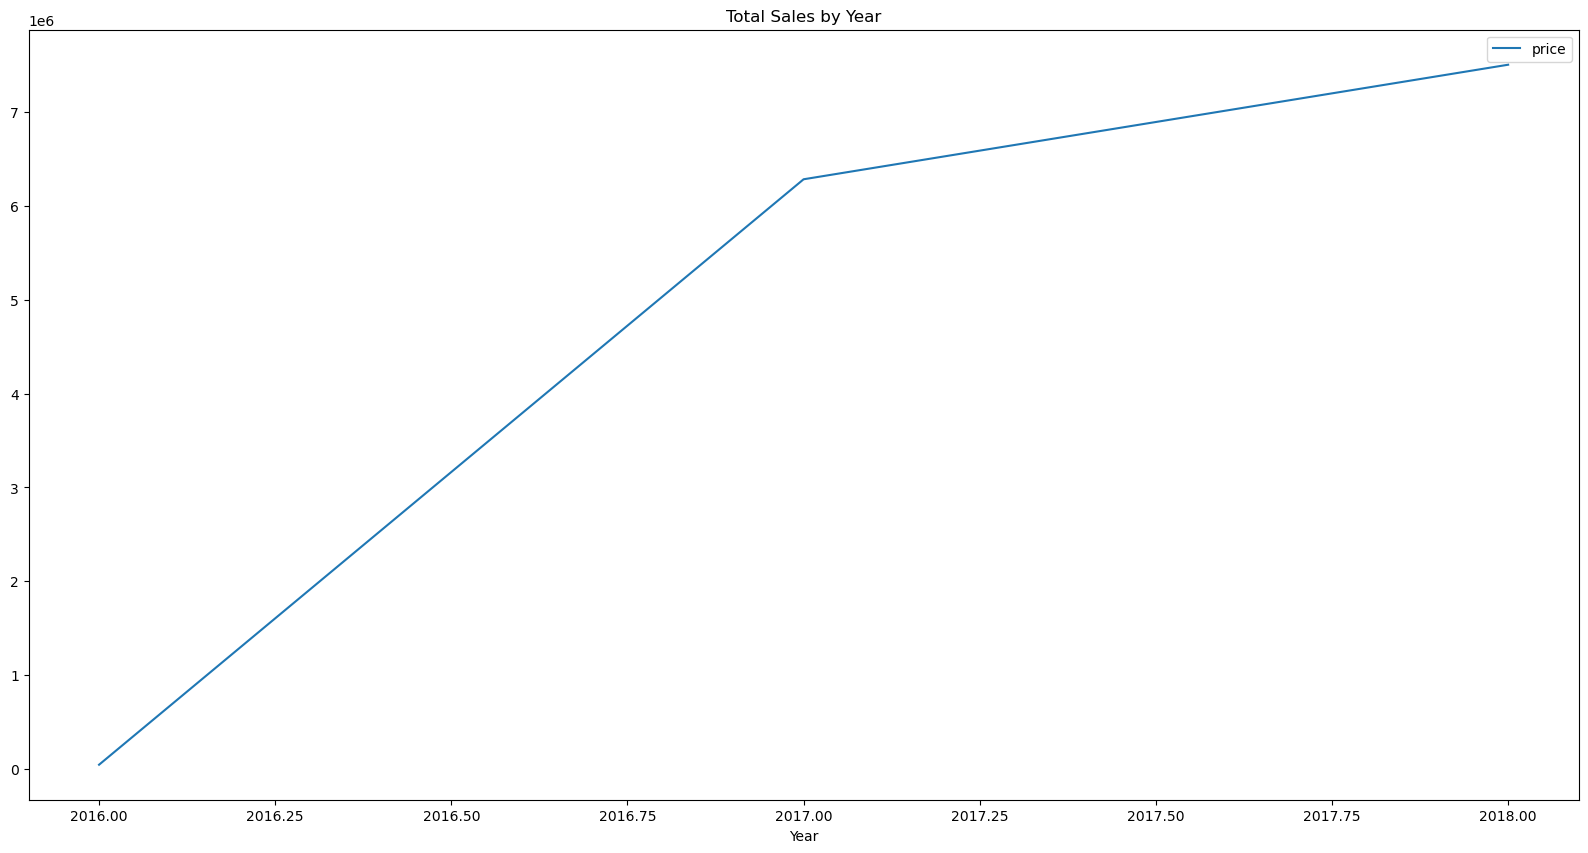

In [90]:
#Total Sales By Year
f_data.groupby(by=['Year'])[['price']].sum().plot(kind='line',figsize=[20,10],title='Total Sales by Year')
plt.show()

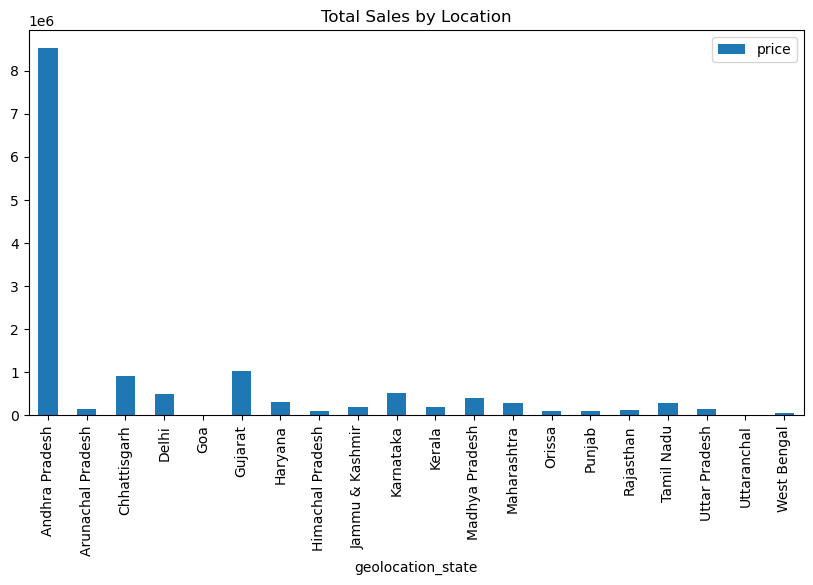

In [91]:
#Total Sales By Location
f_data.groupby(by=['geolocation_state'])[['price']].sum().plot(kind='bar',figsize=[10,5],title='Total Sales by Location')
plt.show()

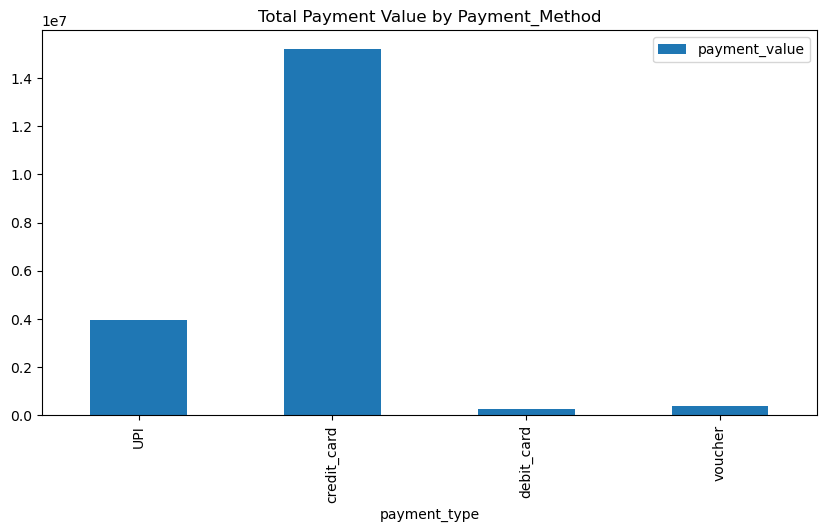

In [92]:
#Total Payment Value by Channel
f_data.groupby(by=['payment_type'])[['payment_value']].sum().plot(kind='bar',figsize=[10,5],title='Total Payment Value by Payment_Method')
plt.show()

In [93]:
#Top Seller City By Price
top_seller_city=f_data.groupby(by=['seller_city'])[['price']].sum()
top_seller_city.sort_values(by='price',ascending=False).iloc[:5,:]


,price
seller_city,
Akkarampalle,3062459.55
Tarsali,662361.01
Anakapalle,485251.45
Badepalle,356189.91
Bestavaripeta,328349.49


In [94]:
#Top Seller State by Price
top_seller_state=f_data.groupby(by=['seller_state'])[['price']].sum()
top_seller_state.sort_values(by='price',ascending=False).iloc[:5,:]


,price
seller_state,
Andhra Pradesh,9354446.73
Gujarat,1774012.49
Chhattisgarh,767258.77
Haryana,380475.56
Delhi,302855.17


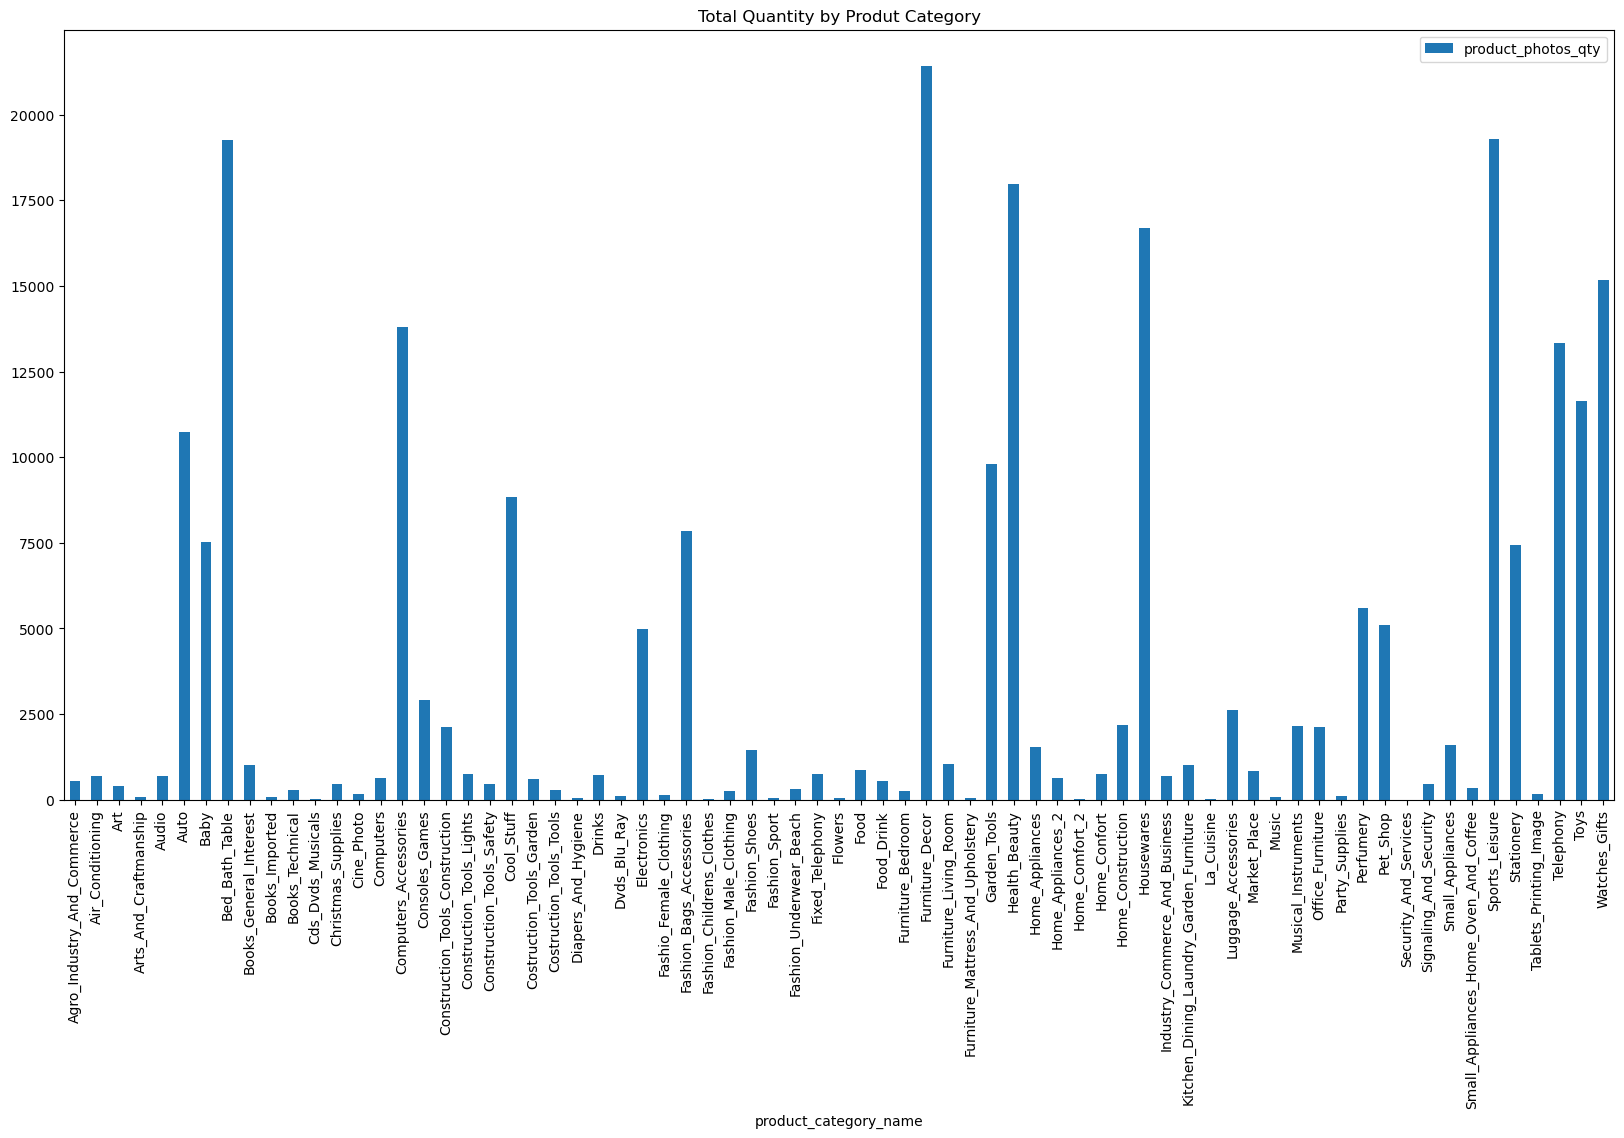

In [95]:
#Total Quantity by Product Category
f_data.groupby(by=['product_category_name'])[['product_photos_qty']].sum().plot(kind='bar',figsize=[20,10],title='Total Quantity by Produt Category')
plt.show()

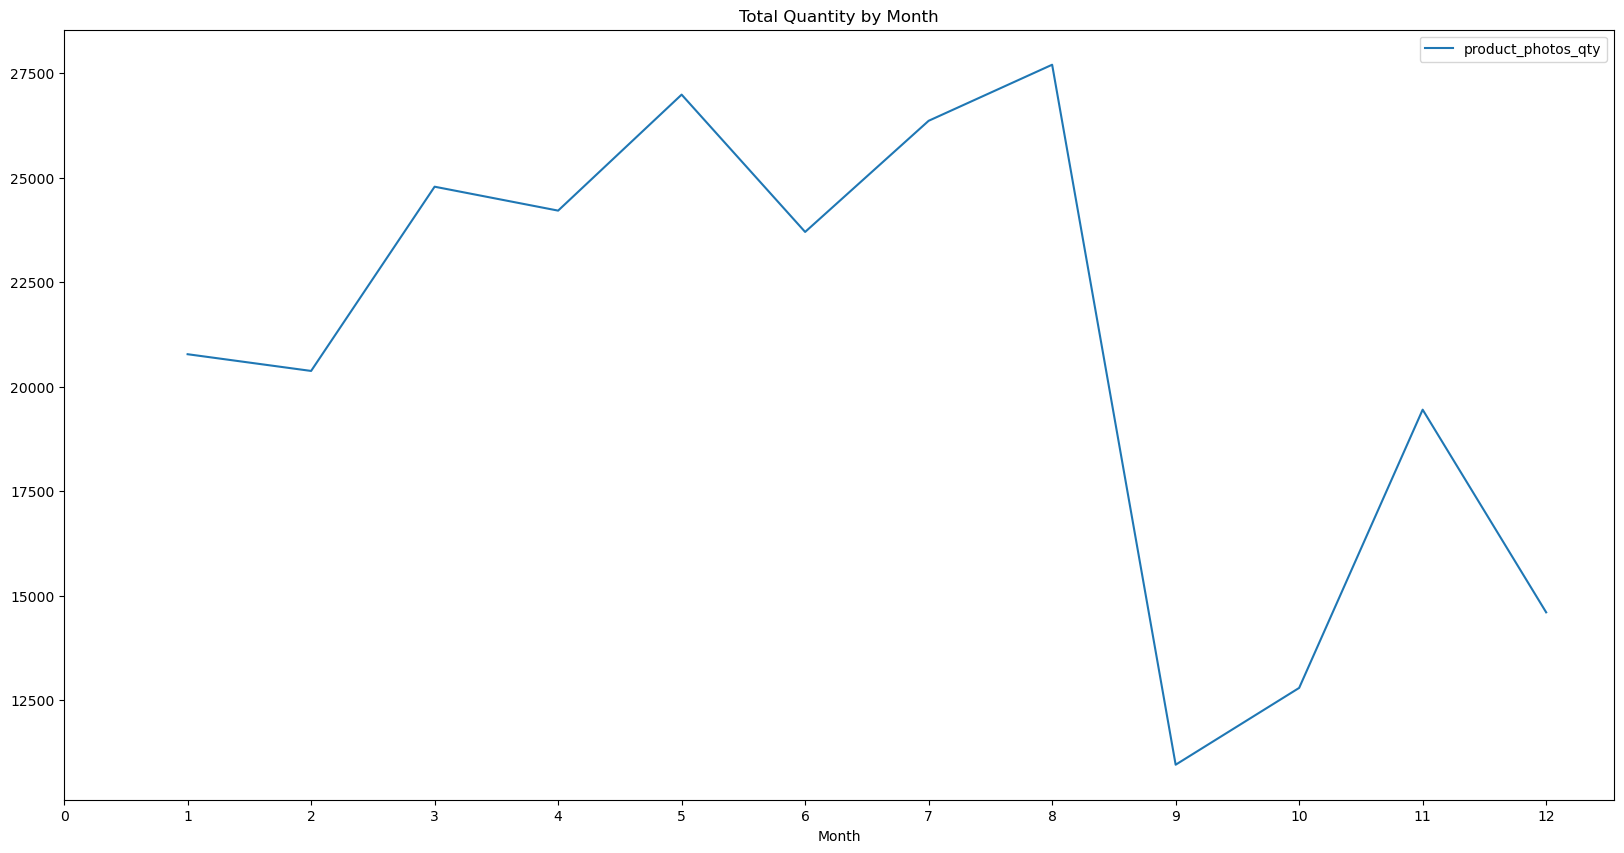

In [96]:
#Total Quantity by Month
f_data.groupby(by=['Month'])[['product_photos_qty']].sum().plot(kind='line',figsize=[20,10],title='Total Quantity by Month',xticks=range(0,13))
plt.show()

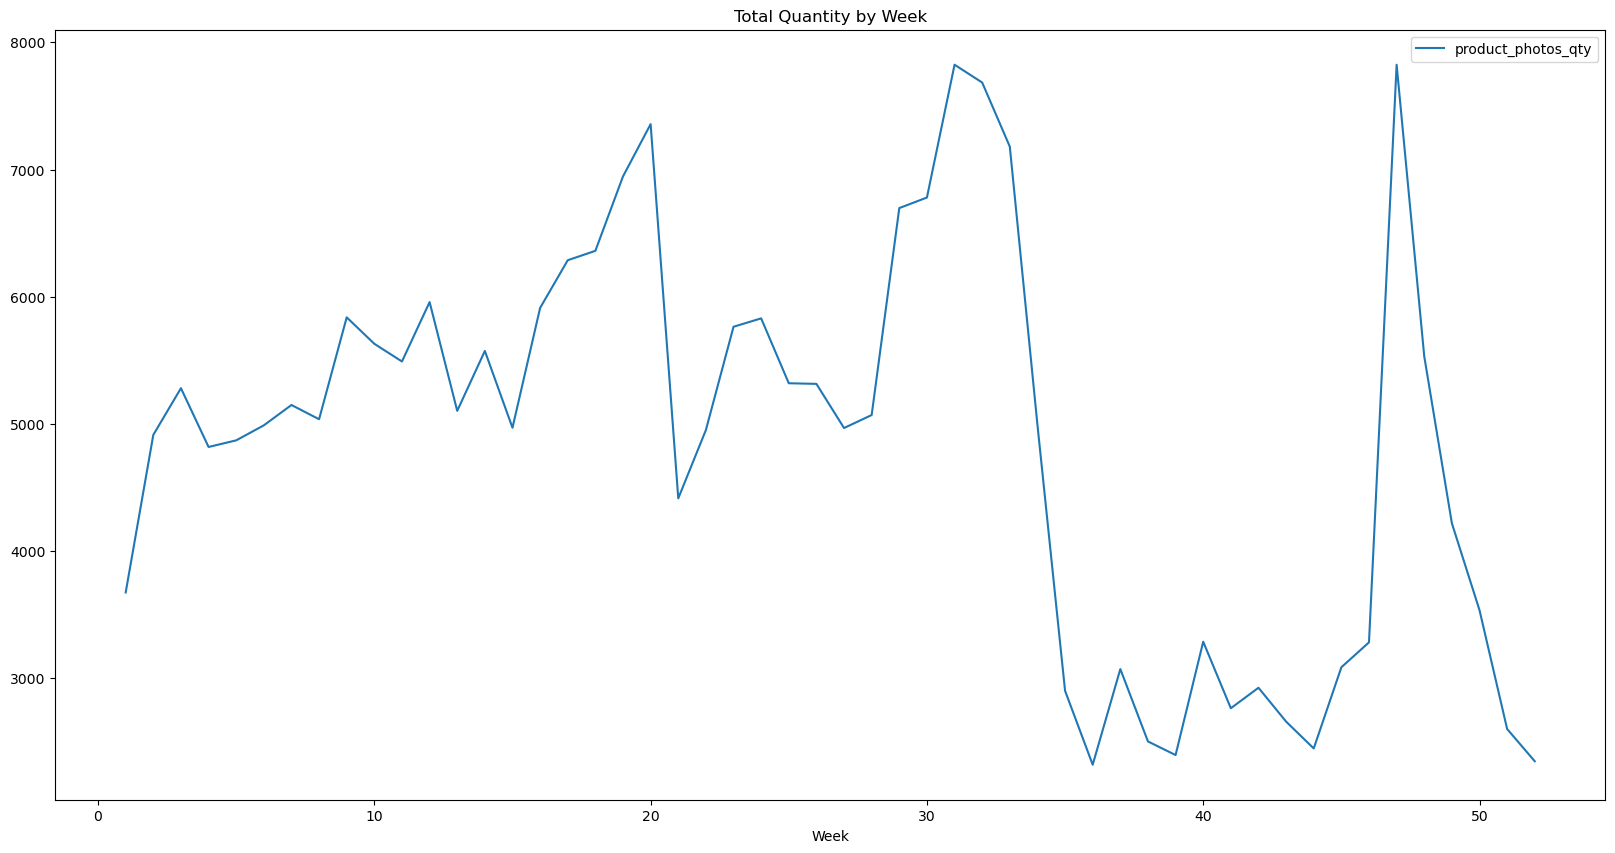

In [97]:
#Total Quantity by Week
f_data.groupby(by=['Week'])[['product_photos_qty']].sum().plot(kind='line',figsize=[20,10],title='Total Quantity by Week')
plt.show()

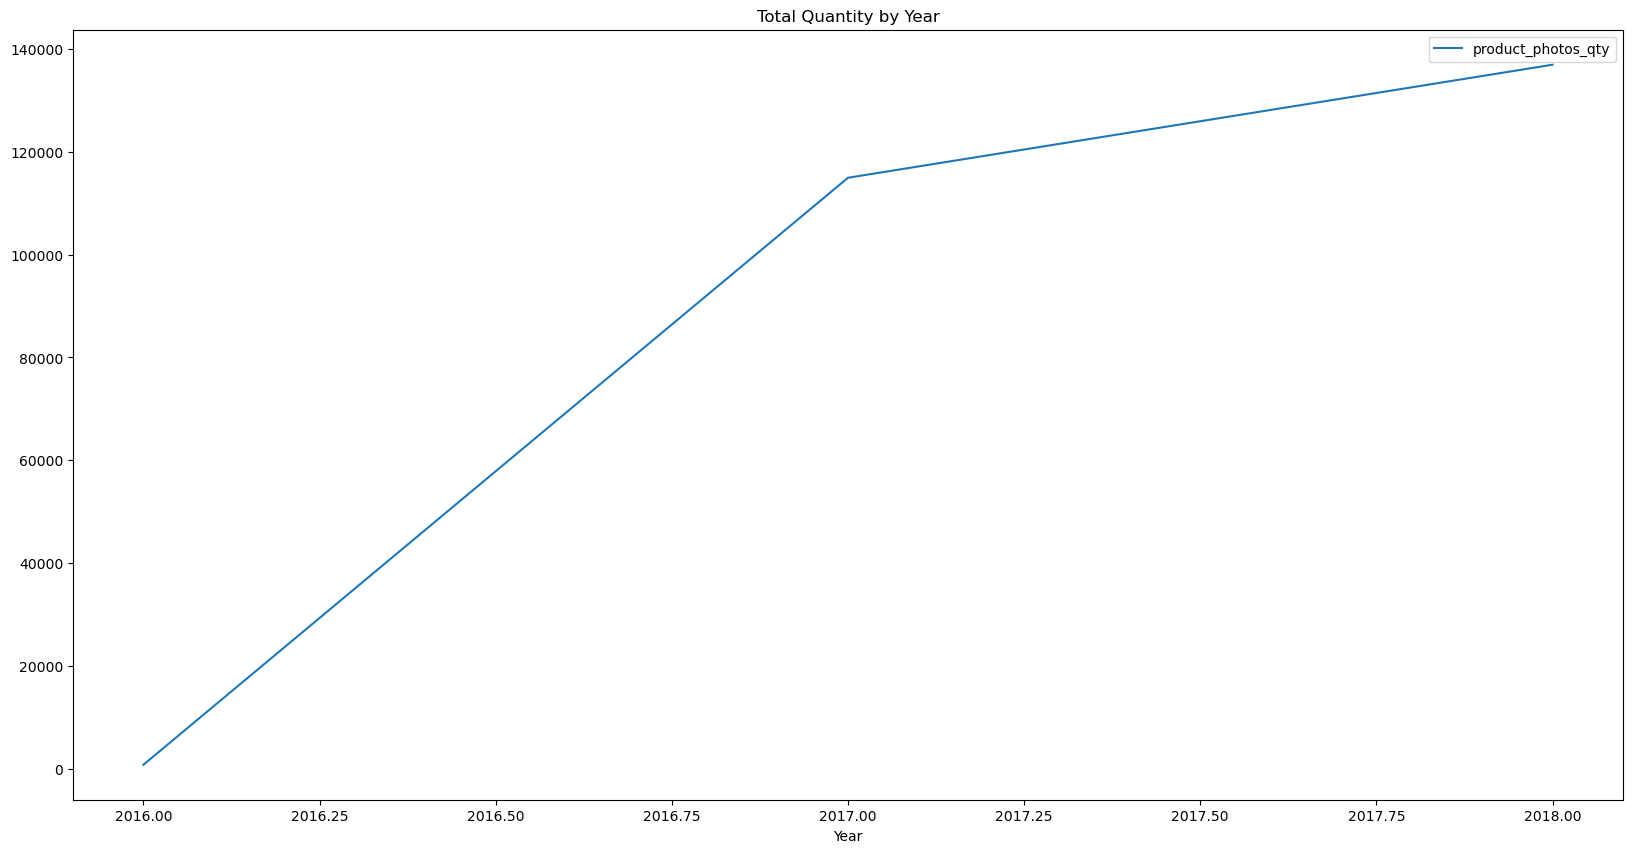

In [98]:
#Total Quantity by Year
f_data.groupby(by=['Year'])[['product_photos_qty']].sum().plot(kind='line',figsize=[20,10],title='Total Quantity by Year')
plt.show()

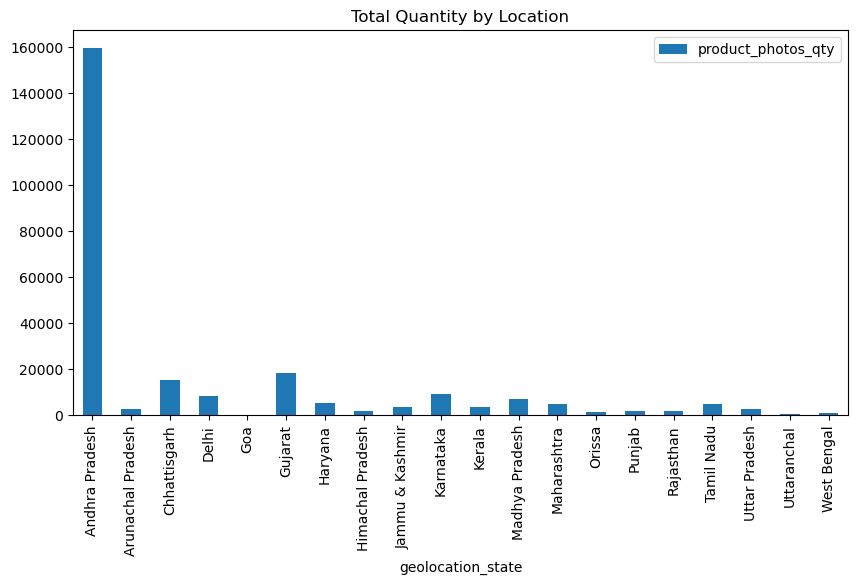

In [99]:
#Total Quantity by Location
f_data.groupby(by=['geolocation_state'])[['product_photos_qty']].sum().plot(kind='bar',figsize=[10,5],title='Total Quantity by Location')
plt.show()

In [100]:
#Total Seller City By Quantity
top_seller_city=f_data.groupby(by=['seller_city'])[['product_photos_qty']].sum()
top_seller_city.sort_values(by='product_photos_qty',ascending=False).iloc[:5,:]


,product_photos_qty
seller_city,
Akkarampalle,78503.0
Tarsali,11607.0
Anakapalle,6814.0
Bheemavaram,6092.0
Badepalle,5280.0


In [101]:
#Total Seller State By Quantity
top_seller_state=f_data.groupby(by=['seller_state'])[['product_photos_qty']].sum()
top_seller_state.sort_values(by='product_photos_qty',ascending=False).iloc[:5,:]


,product_photos_qty
seller_state,
Andhra Pradesh,179507.0
Gujarat,28081.0
Chhattisgarh,11462.0
Haryana,7596.0
Karnataka,5902.0


In [102]:
# Top Product By Month
top_prod_month=f_data.groupby(by=['Month'])[['product_id']].count()
top_prod_month.sort_values(by='product_id').iloc[:3,:]

,product_id
Month,
9,5028
10,5825
12,6454


In [103]:
#Top Product Category by Month
top_prod_category=f_data.groupby(by=['product_category_name','Month'])[['price']].sum()
top_prod_category.sort_values(by='price',ascending=False).iloc[:5,:]


price
product_category_name Month           
Health_Beauty         8      173041.08
Watches_Gifts         5      159843.21
Health_Beauty         5      144845.84
                      7      141552.29
                      6      141161.09

In [104]:
#Top Product Category by Seller City
top_prod_seller_city=f_data.groupby(by=['product_category_name','seller_city'])[['price']].sum()
top_prod_seller_city.sort_values(by='price',ascending=False).iloc[:5,:]


,,price
product_category_name,seller_city,
Bed_Bath_Table,Tarsali,538919.43
Cool_Stuff,Akkarampalle,300003.36
Furniture_Decor,Akkarampalle,268923.89
Health_Beauty,Akkarampalle,261156.43
Sports_Leisure,Akkarampalle,235136.96


In [105]:
#Top Product Category by Seller State
top_prod_seller_state=f_data.groupby(by=['product_category_name','seller_state'])[['price']].sum()
top_prod_seller_state.sort_values(by='price',ascending=False).iloc[:5,:]


,,price
product_category_name,seller_state,
Health_Beauty,Andhra Pradesh,947160.67
Watches_Gifts,Andhra Pradesh,862747.99
Computers_Accessories,Andhra Pradesh,666910.86
Sports_Leisure,Andhra Pradesh,632181.26
Bed_Bath_Table,Andhra Pradesh,619624.75


In [106]:
# Top State and Category By Price
top_prod_state=f_data.groupby(by=['geolocation_state','product_category_name'])[['price']].sum()
top_prod_state.sort_values(by='price',ascending=False).iloc[:10,:]


price
geolocation_state product_category_name           
Andhra Pradesh    Bed_Bath_Table         815395.06
                  Health_Beauty          774153.95
                  Watches_Gifts          756271.06
                  Sports_Leisure         612898.23
                  Computers_Accessories  586092.71
                  Furniture_Decor        480125.28
                  Housewares             421779.37
                  Cool_Stuff             369735.04
                  Auto                   328428.63
                  Toys                   307697.96

In [107]:
# Top State,Category and Month By Price
top_prod_state_month=f_data.groupby(by=['geolocation_state','product_category_name','Month'])[['price']].sum()
top_prod_state_month.sort_values(by='price',ascending=False).iloc[:10,:]


price
geolocation_state product_category_name Month           
Andhra Pradesh    Health_Beauty         8      110846.01
                  Watches_Gifts         5      103399.87
                  Health_Beauty         5       99630.38
                  Bed_Bath_Table        8       89092.00
                  Health_Beauty         6       88448.16
                  Bed_Bath_Table        7       87751.67
                  Health_Beauty         7       80455.78
                  Bed_Bath_Table        5       80347.67
                  Watches_Gifts         3       80137.31
                                        4       79221.70

In [108]:
#Top Product Category 
top_prod_by_price=f_data.groupby(by=['product_category_name'])[['price']].sum()
top_prod_by_price.sort_values(by='price',ascending=False).iloc[:10,:]


,price
product_category_name,
Bed_Bath_Table,1278077.38
Health_Beauty,1273331.77
Watches_Gifts,1207894.55
Sports_Leisure,994682.47
Computers_Accessories,921345.04
Furniture_Decor,751626.40
Housewares,649733.90
Cool_Stuff,634685.26
Auto,602906.73


In [109]:
#Top Category by Maximum Payment Value with a Channel
top_prod_by_typemode=f_data.groupby(by=['product_category_name','payment_type'])[['payment_value']].max()
top_prod_by_typemode.sort_values(by='payment_value',ascending=False).iloc[:10,:]


payment_value
product_category_name      payment_type               
Fixed_Telephony            credit_card        13664.08
                           UPI                 7274.88
Housewares                 credit_card         6929.31
Computers                  UPI                 6922.21
Art                        UPI                 6726.66
Agro_Industry_And_Commerce UPI                 6081.54
Small_Appliances           credit_card         4950.34
Computers                  credit_card         4681.78
Musical_Instruments        credit_card         4513.32
Watches_Gifts              debit_card          4445.50

In [110]:
#This say about Customer Statisfaction Towards Product
# top 10 product which got maximum review score
top_prod_score=f_data.groupby(by='product_category_name')[['review_score']].max()
top_prod_score.sort_values(by='review_score',ascending=False).iloc[:10,:]

,review_score
product_category_name,
Agro_Industry_And_Commerce,5
Home_Appliances,5
Industry_Commerce_And_Business,5
Housewares,5
Home_Construction,5
Home_Confort,5
Home_Comfort_2,5
Home_Appliances_2,5
Health_Beauty,5


In [111]:
#bottom 10 product which got minimum review score
top_prod_score=f_data.groupby(by='product_category_name')[['review_score']].min()
top_prod_score.sort_values(by='review_score',ascending=True).iloc[:10,:]

,review_score
product_category_name,
Agro_Industry_And_Commerce,1
Industry_Commerce_And_Business,1
Housewares,1
Home_Construction,1
Home_Confort,1
Home_Comfort_2,1
Home_Appliances_2,1
Kitchen_Dining_Laundry_Garden_Furniture,1
Home_Appliances,1


In [112]:
#which category has taken a highest payment installments by which mode
f_data.groupby(by=['product_category_name','payment_type'])[['payment_installments']].max().sort_values(by='payment_installments',ascending=False).iloc[:5,:]

,,payment_installments
product_category_name,payment_type,
Cool_Stuff,credit_card,24
Garden_Tools,credit_card,24
Watches_Gifts,credit_card,24
Furniture_Living_Room,credit_card,24
Health_Beauty,credit_card,24


In [113]:
data=pd.merge(left=cust,right=orders,left_on='customer_id',right_on='customer_id',how='inner')
data=pd.merge(left=data,right=order_item,left_on='order_id',right_on='order_id',how='inner')
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:00,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:00,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:00,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,2018-03-28 16:04:00,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:00,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,2018-08-09 20:55:00,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:00,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110175,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,2018-04-07 16:08:00,2018-04-11 02:08:00,2018-04-13 20:06:00,2018-04-25,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:00,74.90,13.88
110176,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,2018-04-04 08:35:00,2018-04-05 18:42:00,2018-04-11 18:54:00,2018-04-20,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:00,114.90,14.16
110177,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,2018-04-08 20:30:00,2018-04-09 17:52:00,2018-05-09 19:03:00,2018-05-02,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:00,37.00,19.04
110178,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,2017-11-03 21:31:00,2017-11-06 18:24:00,2017-11-16 19:58:00,2017-12-05,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:00,689.00,22.07


In [114]:
data.describe() # to undersatnd maximum and minimum value of price to do segmentation

,customer_zip_code_prefix,order_item_id,price,freight_value
count,110180.000000,110180.000000,110180.000000,110180.000000
mean,35155.850826,1.198212,119.976817,19.948713
std,29901.214959,0.706726,182.309380,15.699220
min,1003.000000,1.000000,0.850000,0.000000
25%,11310.000000,1.000000,39.900000,13.080000
50%,24344.000000,1.000000,74.900000,16.260000
75%,59066.000000,1.000000,134.170000,21.150000
max,99980.000000,21.000000,6735.000000,409.680000


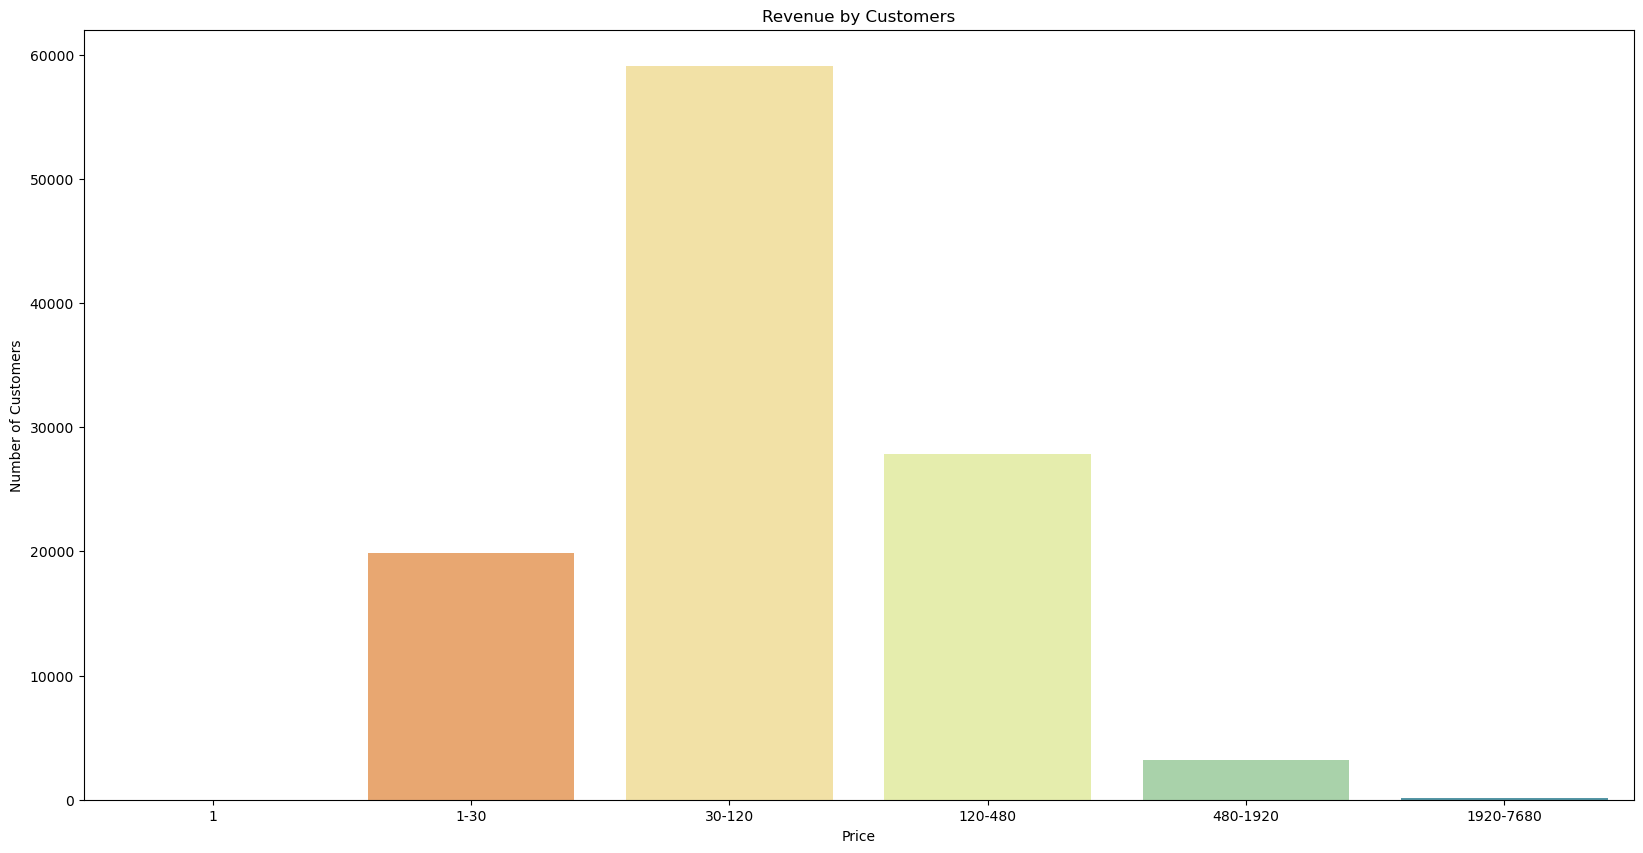

In [115]:
d_1=data["price"][(data['price']<=1)]
d_30=data["price"][(data['price']>1) & (data['price']<=30)]
d_120=data["price"][(data['price']>30) & (data['price']<=120)]
d_480=data["price"][(data['price']>120) & (data['price']<=480)]
d_1920=data["price"][(data['price']>480) & (data['price']<=1920)]
d_7680=data["price"][(data['price']>1920) & (data['price']<=7680)]

aix=["1","1-30","30-120","120-480","480-1920","1920-7680"]
aiy=[len(d_1.values),len(d_30.values),len(d_120.values),len(d_480.values),len(d_1920.values),len(d_7680.values)]

plt.figure(figsize=(20,10))
sns.barplot(x=aix,y=aiy,palette="Spectral")
plt.title("Revenue by Customers")
plt.xlabel("Price")
plt.ylabel("Number of Customers")
plt.show()

In [116]:
data1=pd.merge(left=order_item,right=sellers,left_on='seller_id',right_on='seller_id',how='inner')
data1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,27277,Serilingampalle,Andhra Pradesh
1,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:00,55.90,9.94,27277,Serilingampalle,Andhra Pradesh
2,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:00,132.90,20.17,27277,Serilingampalle,Andhra Pradesh
3,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:00,58.90,15.16,27277,Serilingampalle,Andhra Pradesh
4,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:00,139.90,16.74,27277,Serilingampalle,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...
112645,fdfeec75aa07c1d2a88b17b8fbfc7b8f,1,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:00,199.99,18.14,14402,Adilabad,Andhra Pradesh
112646,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:00,209.00,16.21,82620,Anakapalle,Andhra Pradesh
112647,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:00,6729.00,193.21,86026,Kapas Hera,Delhi
112648,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:00,27.90,14.44,3124,Akkarampalle,Andhra Pradesh


In [117]:
data1.describe() # to undersatnd maximum and minimum value of price to do segmentation

,order_item_id,price,freight_value,seller_zip_code_prefix
count,112650.000000,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320,24548.810306
std,0.705124,183.633928,15.806405,27704.451806
min,1.000000,0.850000,0.000000,1001.000000
25%,1.000000,39.900000,13.080000,6429.000000
50%,1.000000,74.990000,16.260000,13570.000000
75%,1.000000,134.900000,21.150000,28800.000000
max,21.000000,6735.000000,409.680000,99730.000000


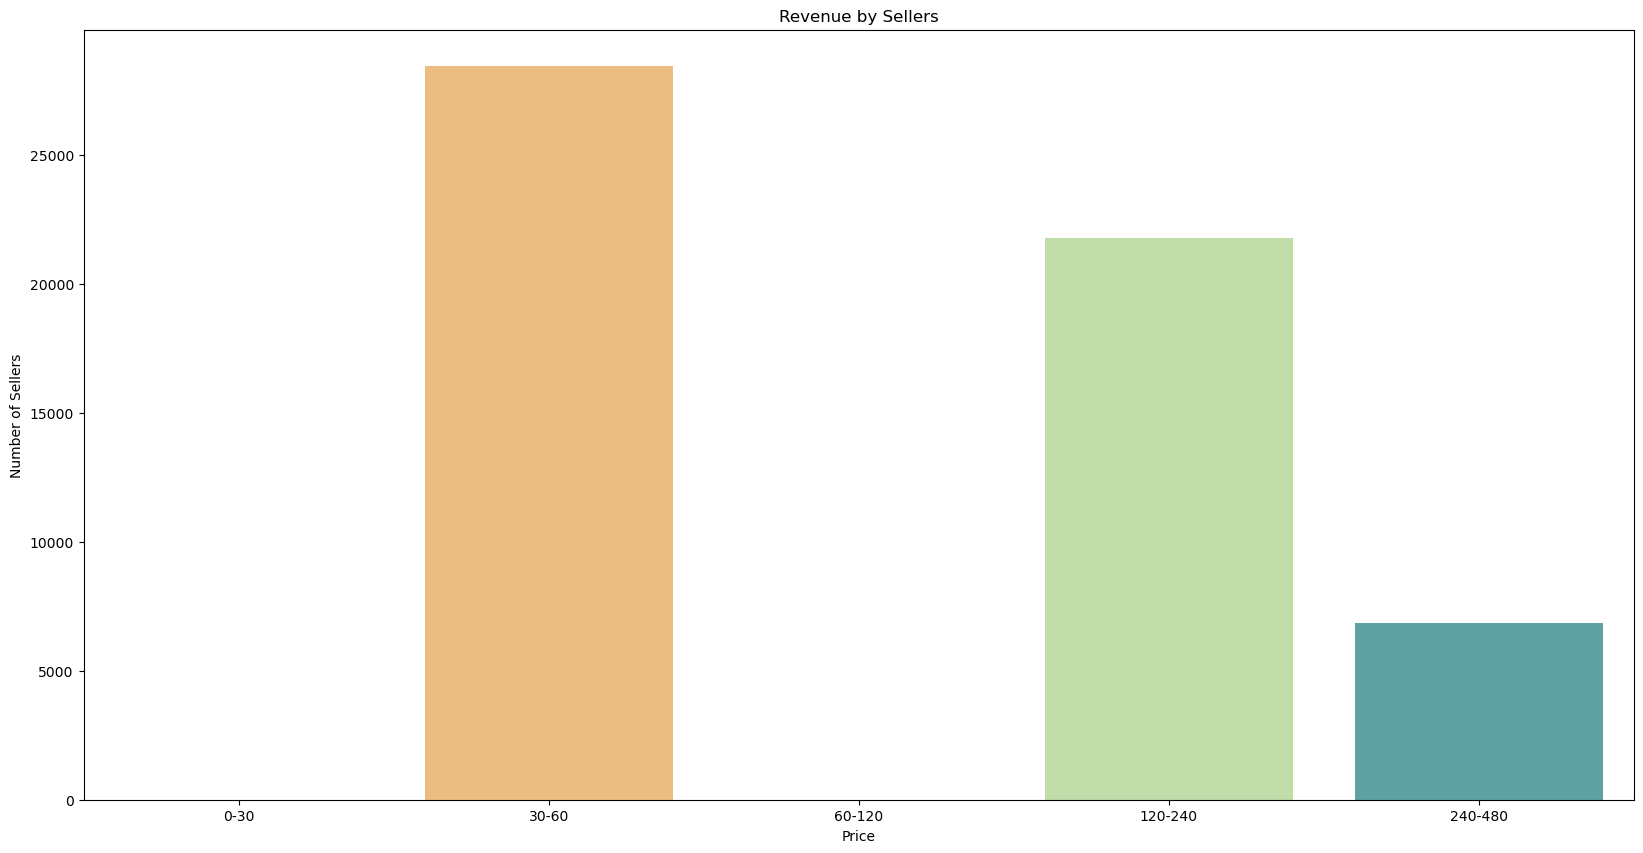

In [118]:
d_30=data1["price"][(data1['price']==0) & (data1['price']<=30)]
d_60=data1["price"][(data1['price']>30) & (data1['price']<=60)]
d_120=data1["price"][(data1['price']>120) & (data1['price']<=120)]
d_240=data1["price"][(data1['price']>120) & (data1['price']<=240)]
d_480=data1["price"][(data1['price']>240) & (data1['price']<=480)]


aix=["0-30","30-60","60-120","120-240","240-480"]
aiy=[len(d_30.values),len(d_60.values),len(d_120.values),len(d_240.values),len(d_480.values)]

plt.figure(figsize=(20,10))
sns.barplot(x=aix,y=aiy,palette="Spectral")
plt.title("Revenue by Sellers")
plt.xlabel("Price")
plt.ylabel("Number of Sellers")
plt.show()

In [119]:
# how customers are paying
f_data.payment_type.unique()

array(['credit_card', 'UPI', 'debit_card', 'voucher'], dtype=object)

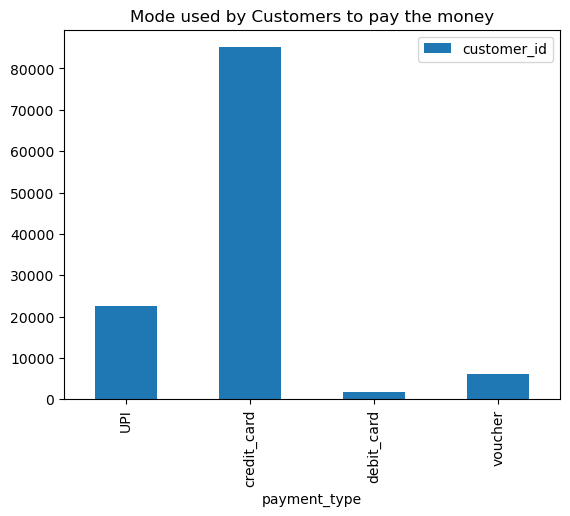

In [120]:
#Most Used Channels By Customers
f_data.groupby(by='payment_type')[['customer_id']].count().plot(kind='bar',title='Mode used by Customers to pay the money')
plt.show()

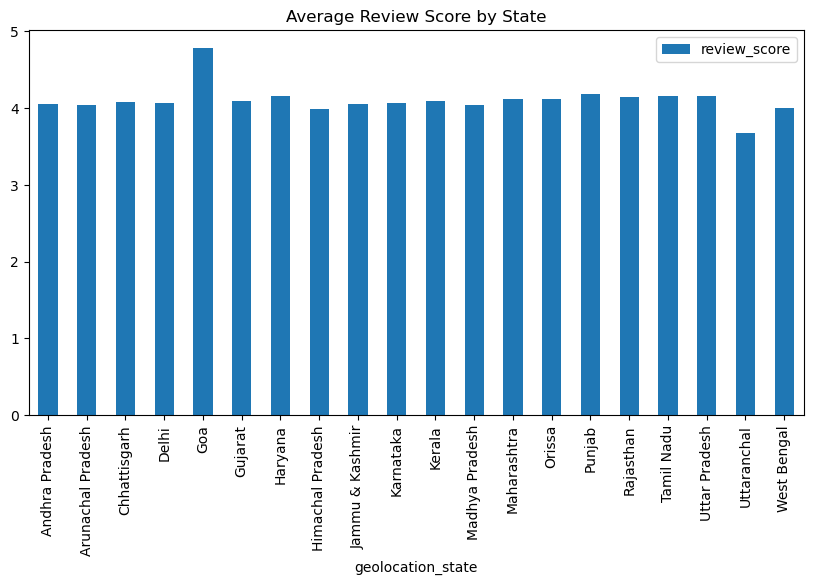

In [121]:
#Customer Statisfaction by State Wise Using Review Score
f_data.groupby(by='geolocation_state')[['review_score']].mean().plot(kind='bar',figsize=[10,5],title='Average Review Score by State')
plt.show()

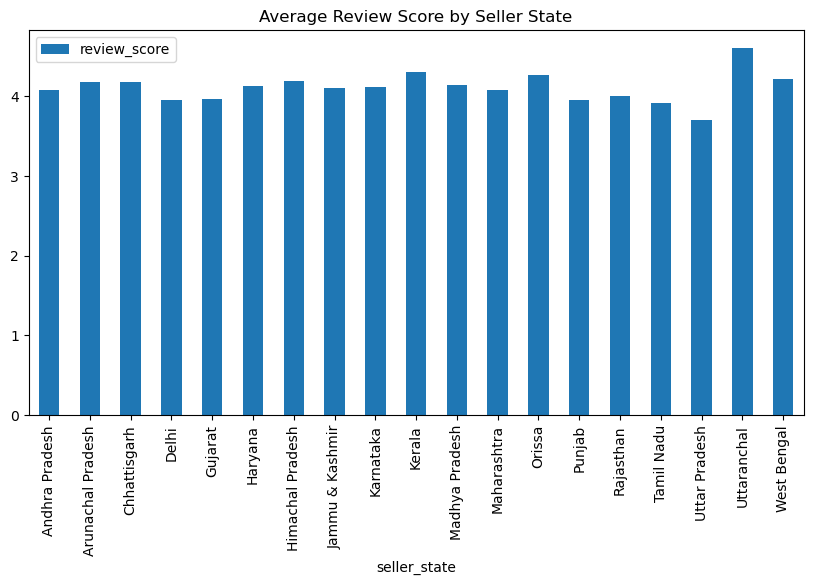

In [122]:
#Customer Statisfaction by Seller State Wise Using Review Score
f_data.groupby(by='seller_state')[['review_score']].mean().plot(kind='bar',figsize=[10,5],title='Average Review Score by Seller State')
plt.show()

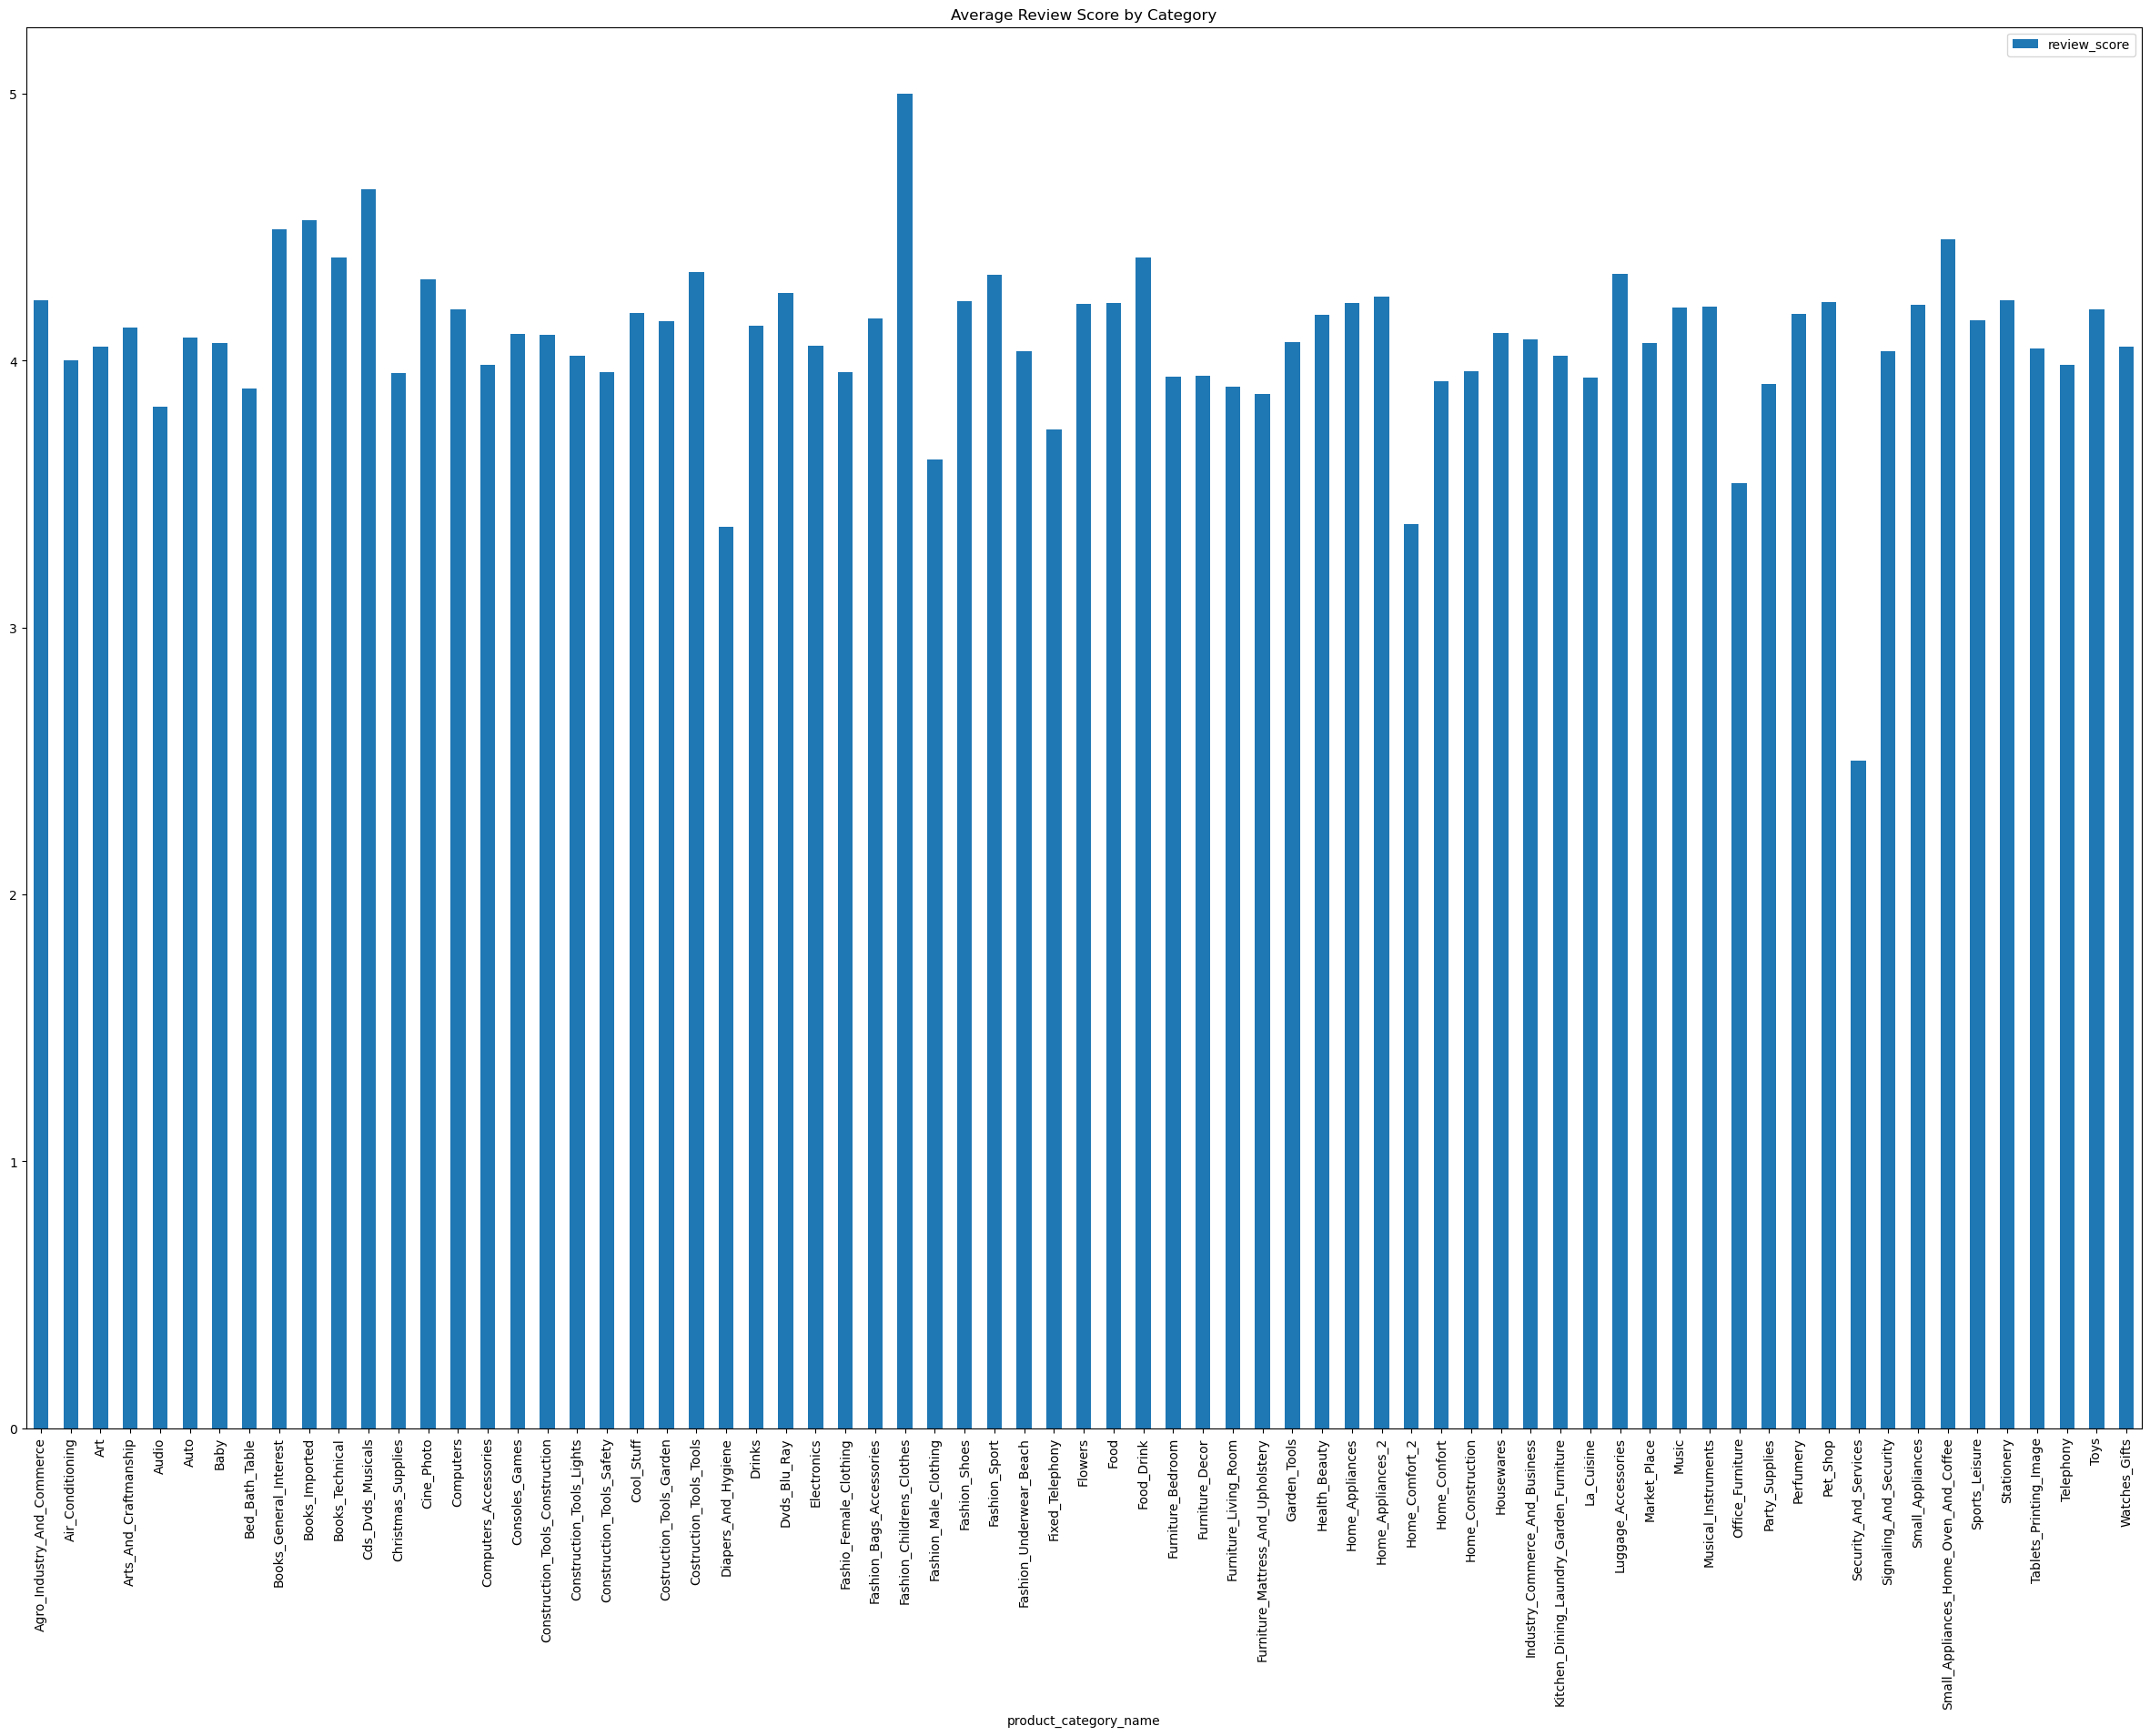

In [123]:
#Customer Statisfaction by Product Category Using Review Score
f_data.groupby(by='product_category_name')[['review_score']].mean().plot(kind='bar',figsize=[30,20],title='Average Review Score by Category')
plt.show()

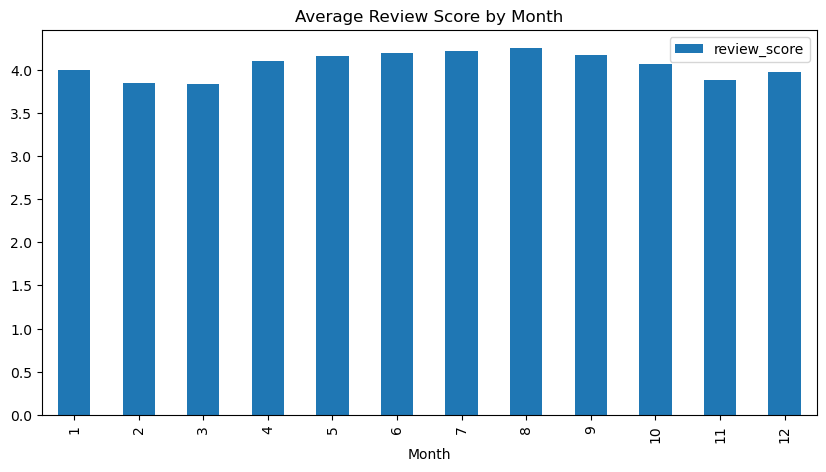

In [124]:
#Customer Statisfaction by Month Using Review Score
f_data.groupby(by='Month')[['review_score']].mean().plot(kind='bar',figsize=[10,5],title='Average Review Score by Month')
plt.show()

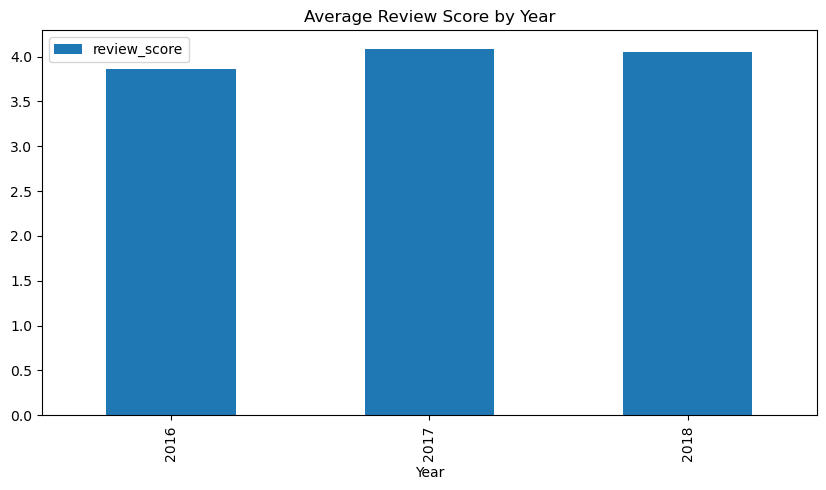

In [125]:
#Customer Statisfaction by Year Using Review Score
f_data.groupby(by='Year')[['review_score']].mean().plot(kind='bar',figsize=[10,5],title='Average Review Score by Year')
plt.show()

In [126]:
#Finding top 10 combinations of products selling together
d=f_data.groupby(['seller_id']).agg({'product_category_name': list}).assign(value=lambda x:x['product_category_name'].str.len())
d=d.sort_values(by='value',ascending=False)
d.iloc[:10,:]


,product_category_name,value
seller_id,,
4a3ca9315b744ce9f8e9374361493884,"[Bed_Bath_Table, Bed_Bath_Table, Bed_Bath_Tabl...",2114
6560211a19b47992c3666cc44a7e94c0,"[Watches_Gifts, Watches_Gifts, Audio, Watches_...",2088
1f50f920176fa81dab994f9023523100,"[Garden_Tools, Garden_Tools, Garden_Tools, Gar...",2006
cc419e0650a3c5ba77189a1882b7556a,"[Health_Beauty, Health_Beauty, Health_Beauty, ...",1818
da8622b14eb17ae2831f4ac5b9dab84a,"[Bed_Bath_Table, Cool_Stuff, Bed_Bath_Table, B...",1654
955fee9216a65b617aa5c0531780ce60,"[Housewares, Housewares, Garden_Tools, Cool_St...",1499
1025f0e2d44d7041d6cf58b6550e0bfa,"[Furniture_Decor, Furniture_Decor, Furniture_D...",1463
7c67e1448b00f6e969d365cea6b010ab,"[Office_Furniture, Office_Furniture, Office_Fu...",1451
7a67c85e85bb2ce8582c35f2203ad736,"[Cool_Stuff, Cool_Stuff, Cool_Stuff, Cool_Stuf...",1223
